<h1 align='center'> CSE 327 - Introduction to Data Science - Major Project

<h3><b>A. Importing essential Modules</b></h3>

First  the python modules that are neccesary for data analysis and machine learning are imported in the next block of code

In [144]:
#Primary Modules

import pandas as pd
import numpy as np

#Visualization Modules

import seaborn as sns
import matplotlib.pyplot as plt

#Feature Selection
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif,f_classif
from lightgbm import plot_importance
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

#Model_selection Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#Data Preprocessing

from sklearn.preprocessing import Normalizer
from imblearn.combine import SMOTEENN,SMOTETomek

#Models
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier as lgb

%matplotlib inline

<h3><b>B. Description of Features of the Dataset </b></h3>

Description of the features of the dataset as provide by the Donald Bren School of Information and Computer Sciences (ICS) which is a part of University of California Irvine (UCI)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Opening the txt file in read mode
f = open(r"/content/drive/MyDrive/Colab Data/IDS_Project/bank-additional-names.txt", "r")
print(f.read()) 
#Closing the txt file
f.close()

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

<h3><b>C. Preliminary Data Overview </b></h3>

Examination of basic layout of the database and composition of unique instances of various features.

In [ ]:
# Import data csv file as a Data Frame
main_data=pd.read_csv(r"/content/drive/MyDrive/Colab Data/IDS_Project/bank-additional-full.csv",delimiter=';')

In [ ]:
# Overview of Five top most data instances

main_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Overview of data types of columns and number of data instances

main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Cheking for duplicate instances
if len(main_data[main_data.duplicated()]) > 0:
  print("\n***Number of duplicated entries: ", len(main_data[main_data.duplicated()]))
  display(main_data[main_data.duplicated(keep=False)].sort_values(by=list(main_data.columns)).head())
else:
  print("\nNo duplicated entries found")


***Number of duplicated entries:  12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [ ]:
# Removing duplicate instances

main_data.drop_duplicates(inplace=True)
main_data.reset_index(inplace=True)

In [ ]:
if len(main_data[main_data.duplicated()]) > 0:
  print("\n***Number of duplicated entries: ", len(main_data[main_data.duplicated()]))
  display(main_data[main_data.duplicated(keep=False)].sort_values(by=list(main_data.columns)).head())
else:
  print("\nNo duplicated entries found")


No duplicated entries found


In [ ]:
# Overview of Categorical Features

columns=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for column in columns:
  print("Unique values for {} column are {}".format(column,main_data[column].unique()))

Unique values for job column are ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for marital column are ['married' 'single' 'divorced' 'unknown']
Unique values for education column are ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for default column are ['no' 'unknown' 'yes']
Unique values for housing column are ['no' 'yes' 'unknown']
Unique values for loan column are ['no' 'yes' 'unknown']
Unique values for contact column are ['telephone' 'cellular']
Unique values for month column are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values for day_of_week column are ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values for poutcome column are ['nonexistent' 'failure' 'success']


In [ ]:
# Overview of data instances present in Categorical Features

for column in columns:
  print("Value count for",column)
  for label in main_data[column].unique():
    print("Value count for {} column for label {} is {}".format(column,label,sum(main_data[column] == label)))
  print("\n")

Value count for job
Value count for job column for label housemaid is 1060
Value count for job column for label services is 3967
Value count for job column for label admin. is 10419
Value count for job column for label blue-collar is 9253
Value count for job column for label technician is 6739
Value count for job column for label retired is 1718
Value count for job column for label management is 2924
Value count for job column for label unemployed is 1014
Value count for job column for label self-employed is 1421
Value count for job column for label unknown is 330
Value count for job column for label entrepreneur is 1456
Value count for job column for label student is 875


Value count for marital
Value count for marital column for label married is 24921
Value count for marital column for label single is 11564
Value count for marital column for label divorced is 4611
Value count for marital column for label unknown is 80


Value count for education
Value count for education column for 

In [ ]:
#Counting Null Instances present in Categorical Features

for column in columns:
  print("Value count for",column)
  if 'unknown' not in main_data[column].unique():
      print("No Null values present in {} column".format(column))
      print("\n")
      continue
  for label in main_data[column].unique():
    if label=='unknown':
      print("Value count for {} column for null values is {}".format(column,sum(main_data[column] == label)))
  print("\n")

Value count for job
Value count for job column for null values is 330


Value count for marital
Value count for marital column for null values is 80


Value count for education
Value count for education column for null values is 1730


Value count for default
Value count for default column for null values is 8596


Value count for housing
Value count for housing column for null values is 990


Value count for loan
Value count for loan column for null values is 990


Value count for contact
No Null values present in contact column


Value count for month
No Null values present in month column


Value count for day_of_week
No Null values present in day_of_week column


Value count for poutcome
No Null values present in poutcome column




In [ ]:
# Overview of Numerical Features
columns=['age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
main_data[columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h3><b>D. Preliminary Data Visulization </b></h3>

Basic exploratory visual analysis of various features.

In [ ]:
columns_num=['age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

columns_cat=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

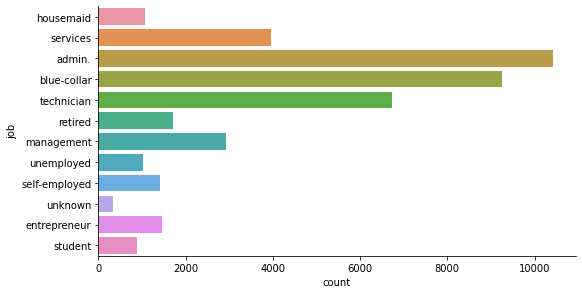

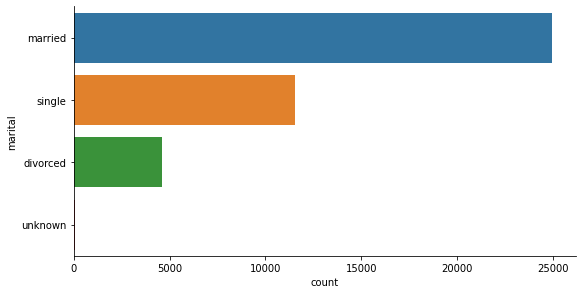

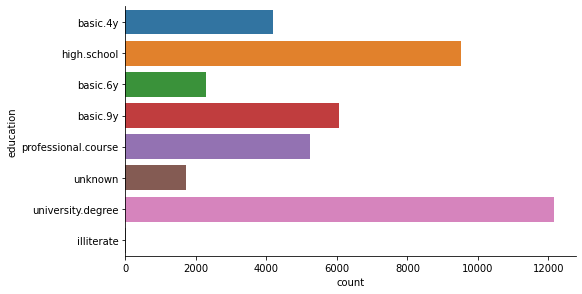

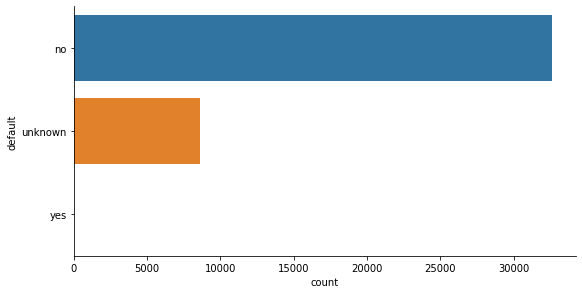

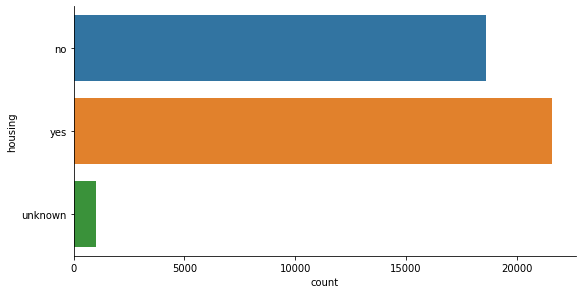

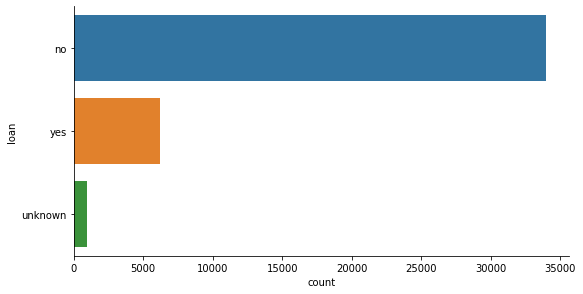

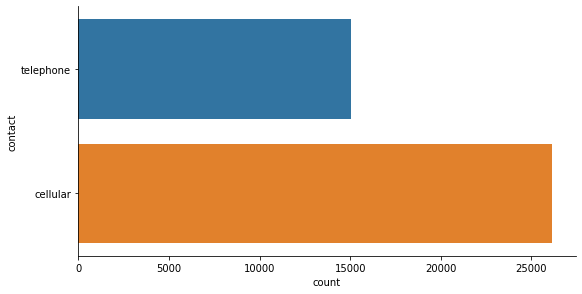

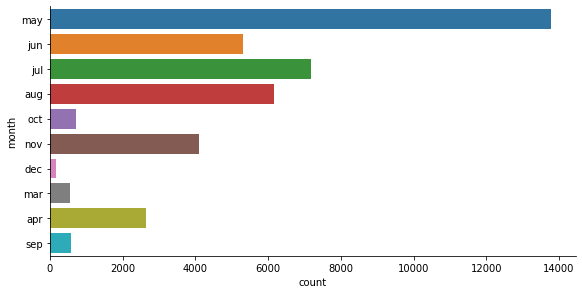

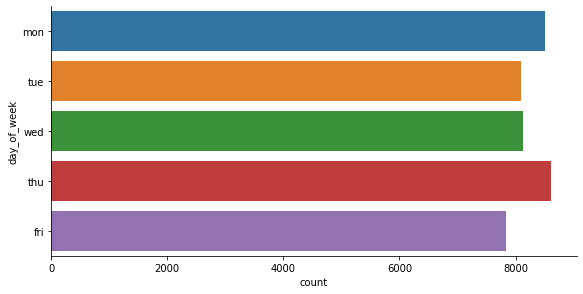

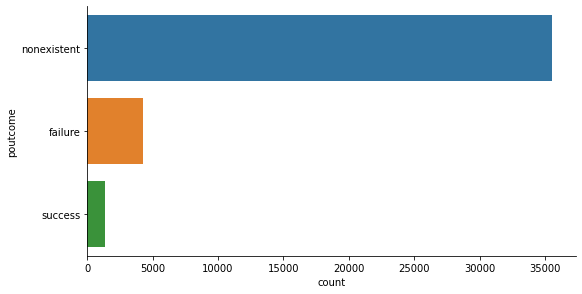

In [ ]:
for column in columns_cat:
  sns.catplot(y=column, data=main_data,kind='count',height=4, aspect=2)

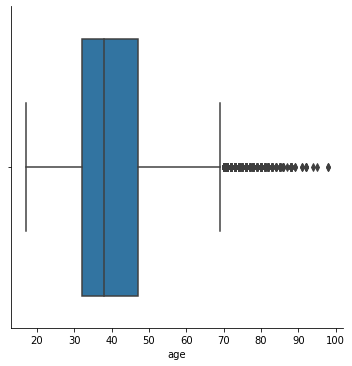

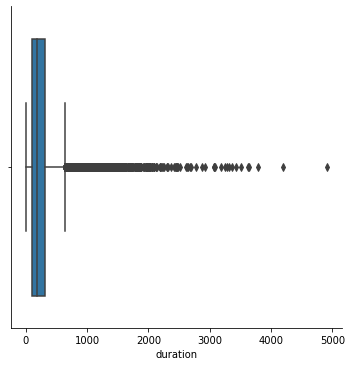

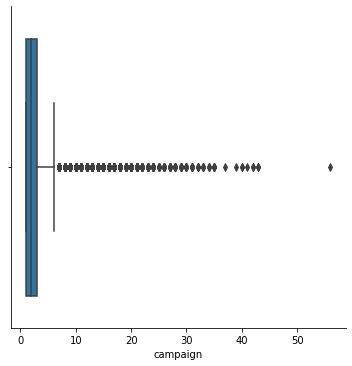

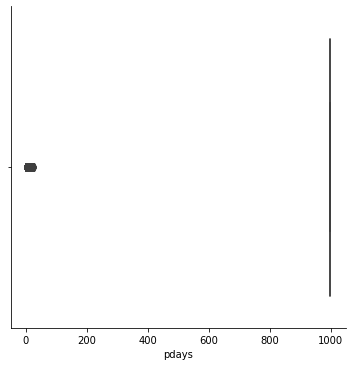

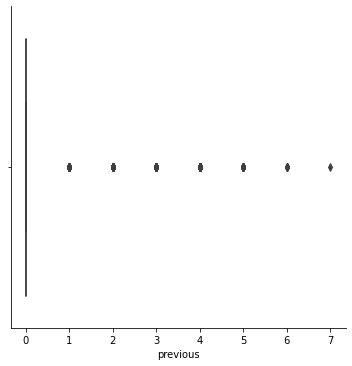

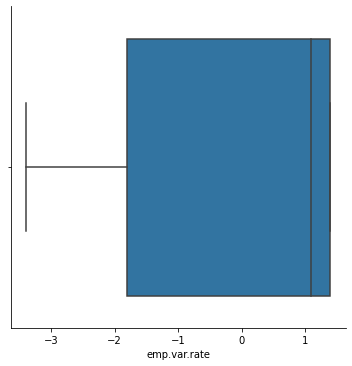

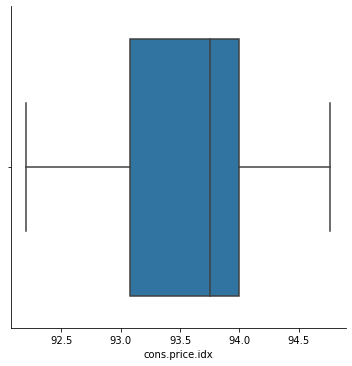

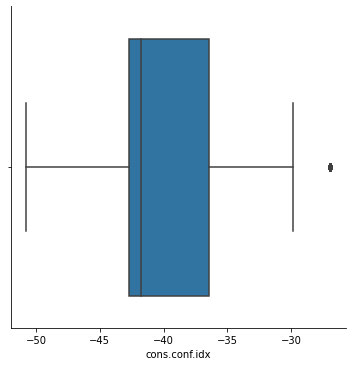

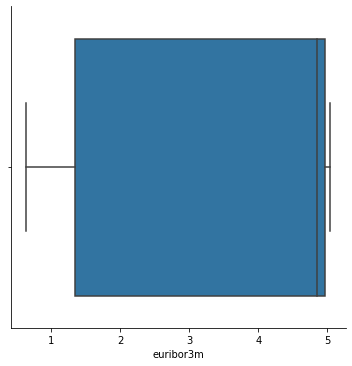

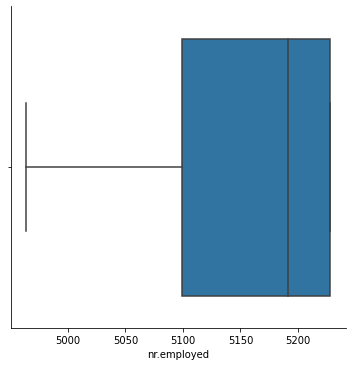

In [ ]:
for column in columns_num:
  sns.catplot(x=column,data=main_data,kind='box')

<h3><b>G. Advanced Data Visulization </b></h3>

Advanced exploratory visual analysis of various features.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

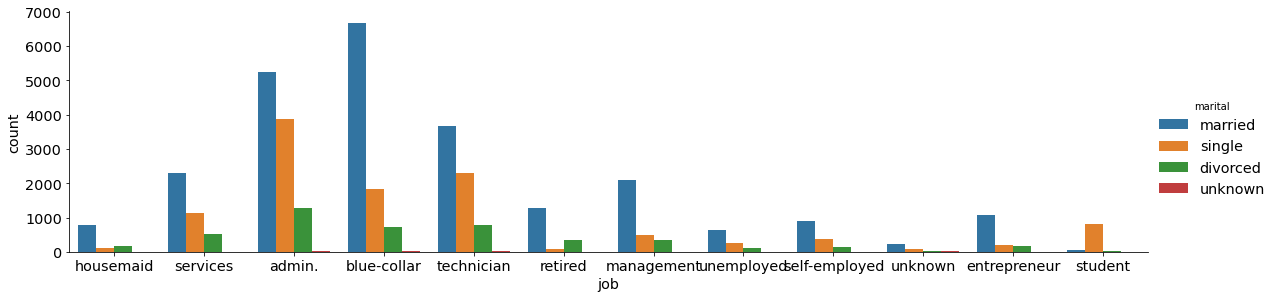

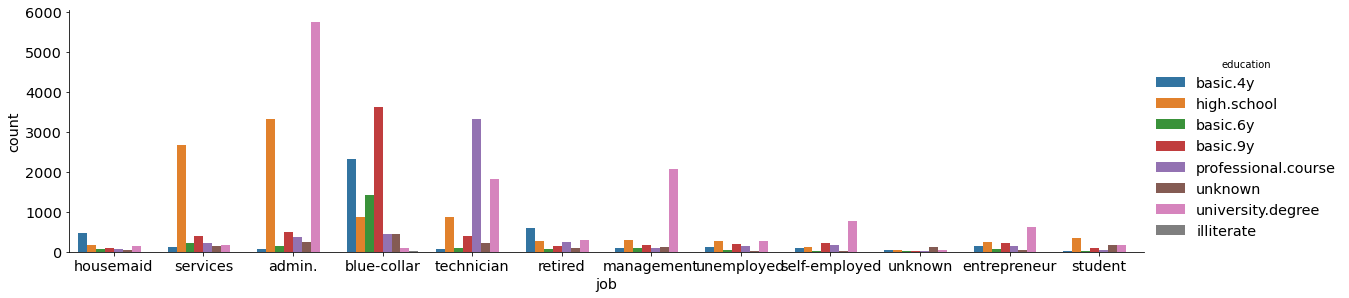

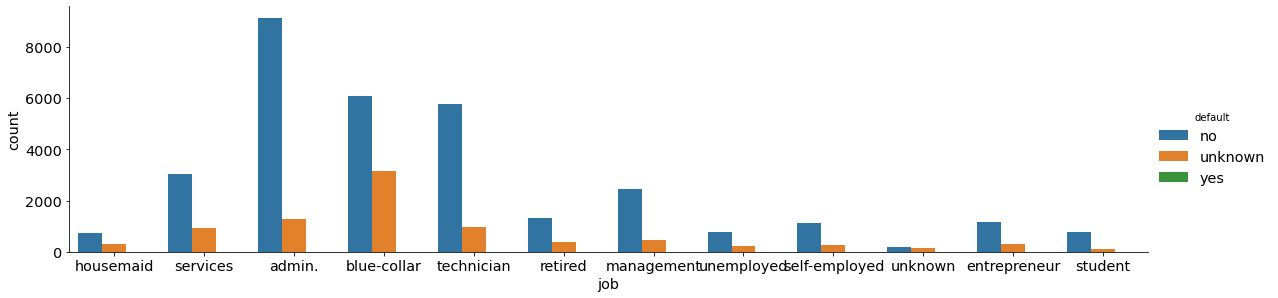

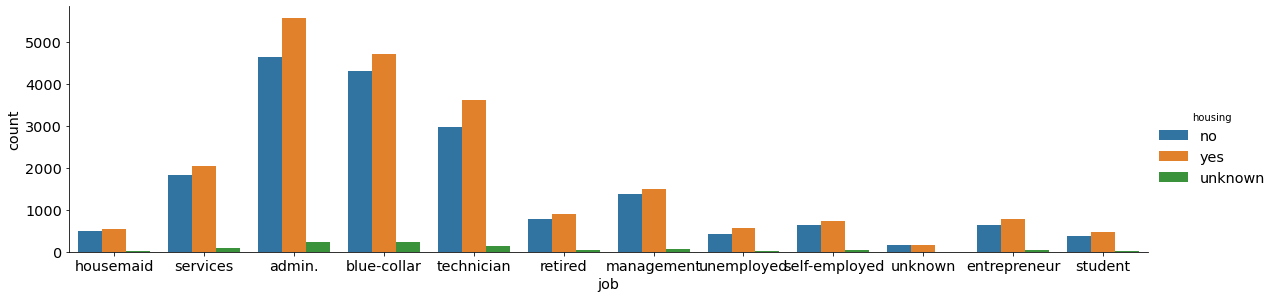

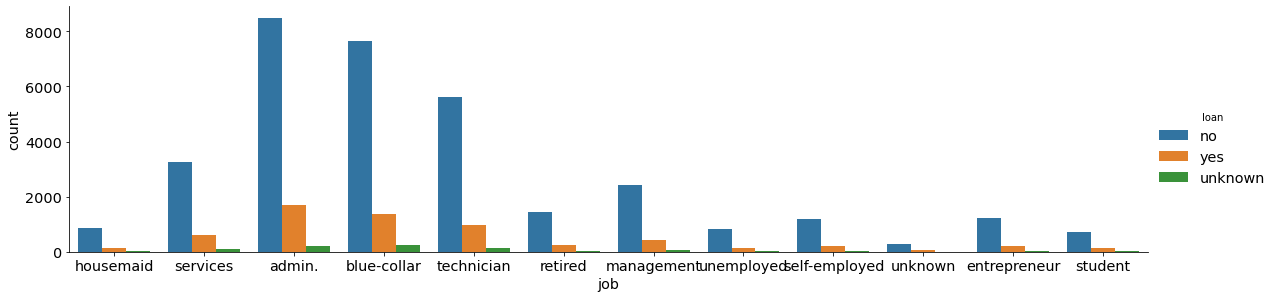

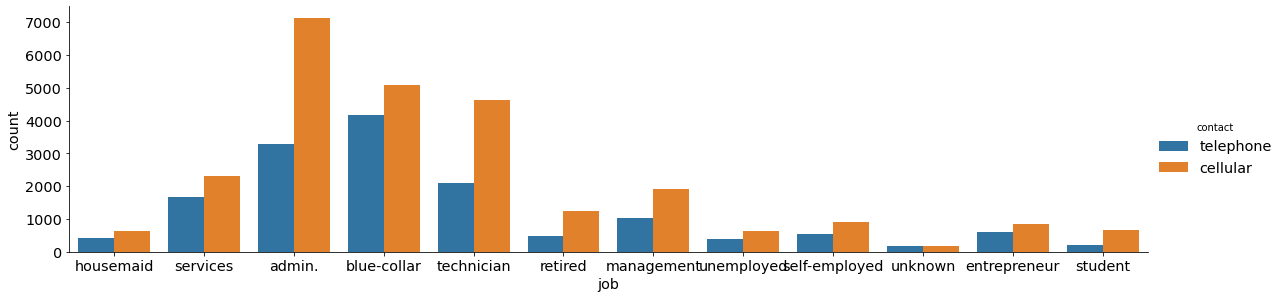

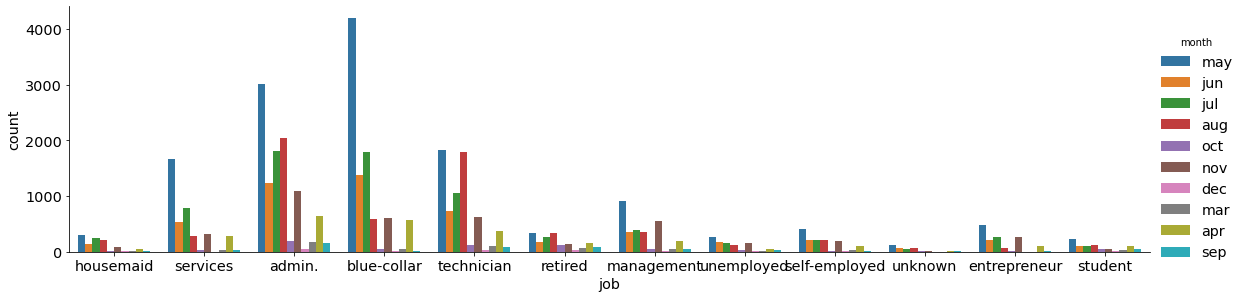

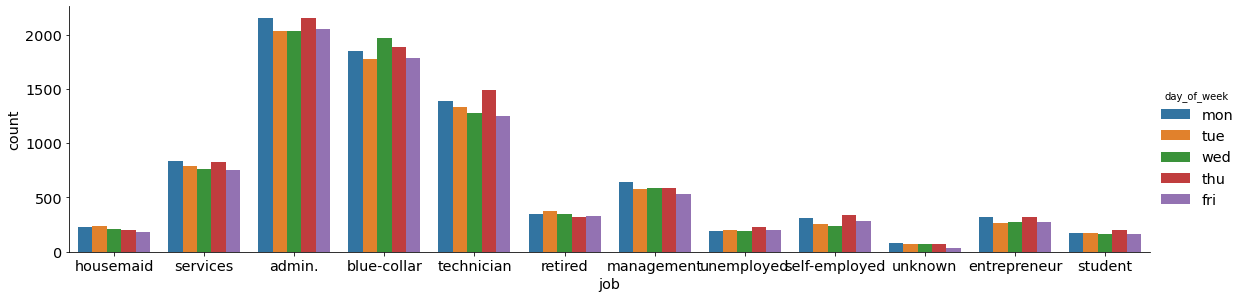

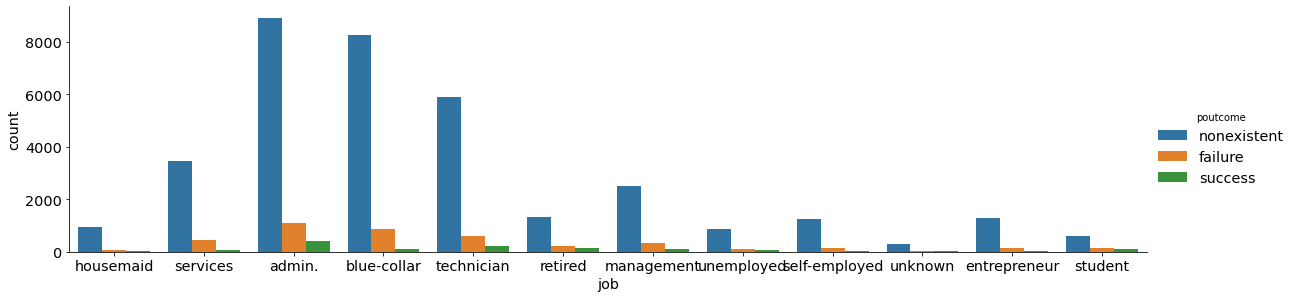

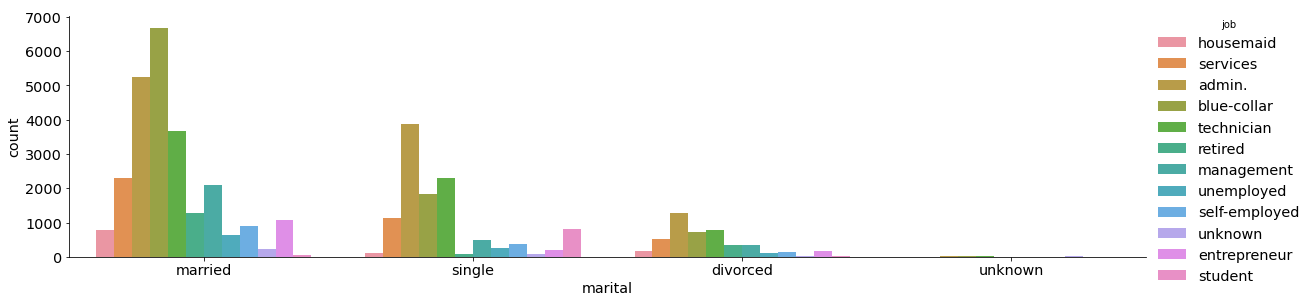

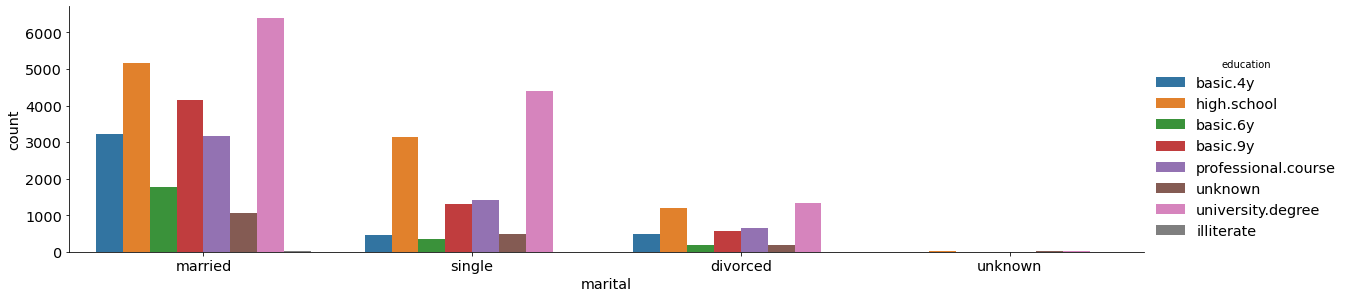

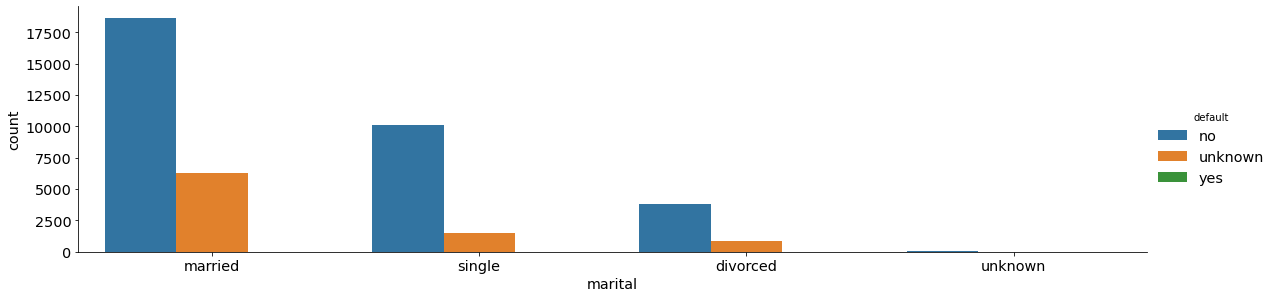

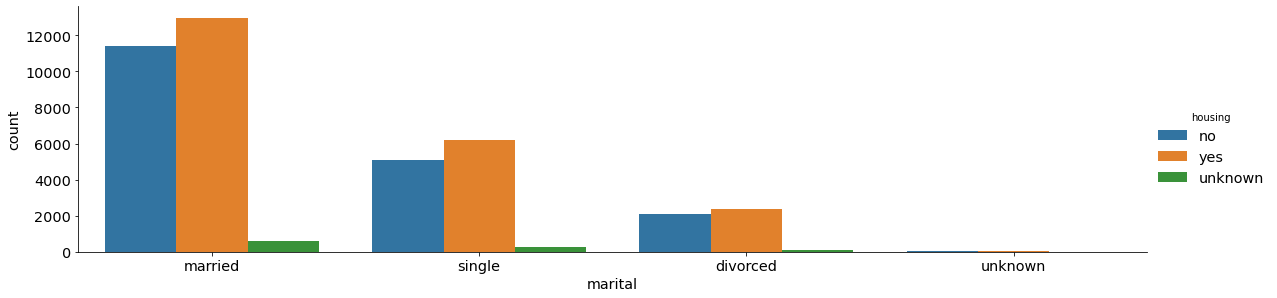

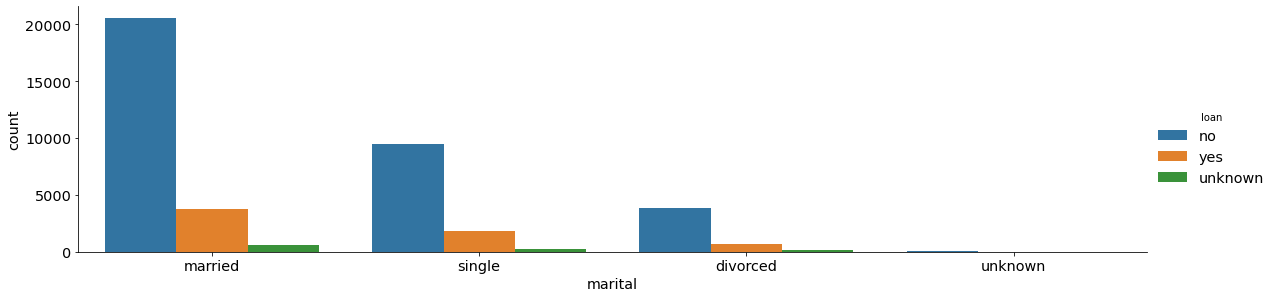

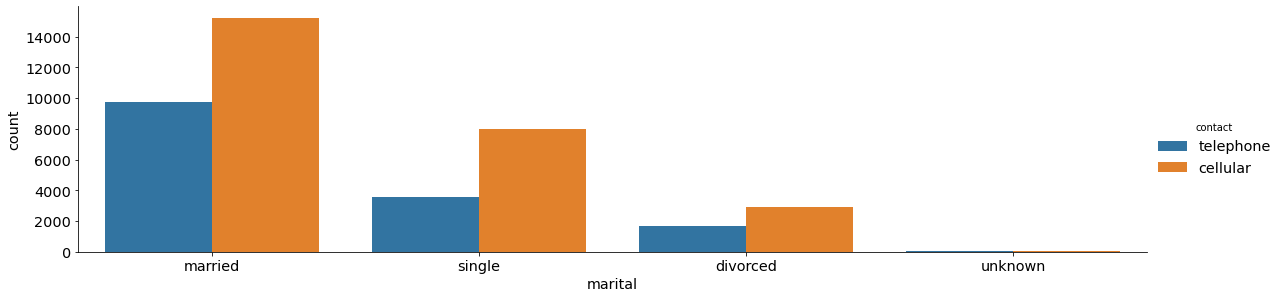

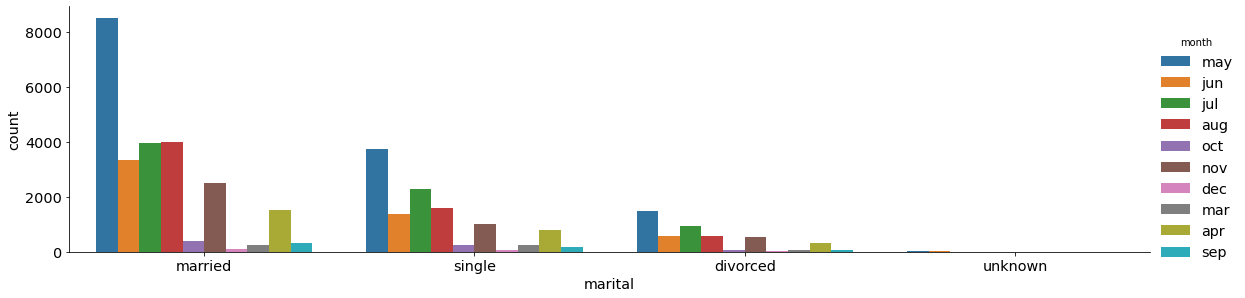

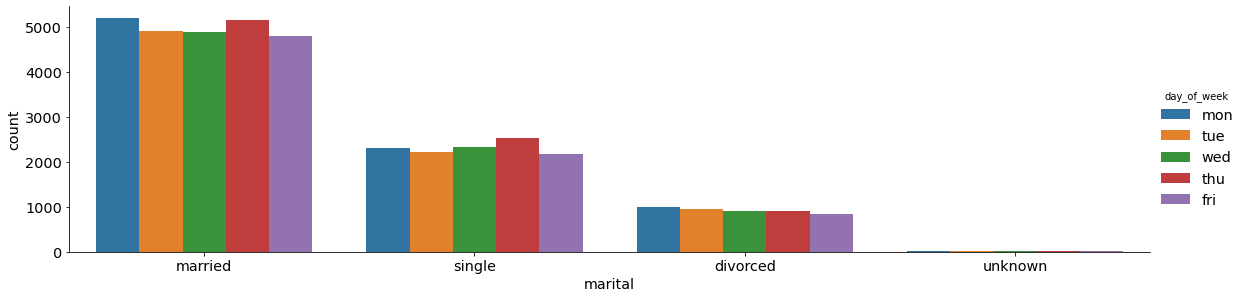

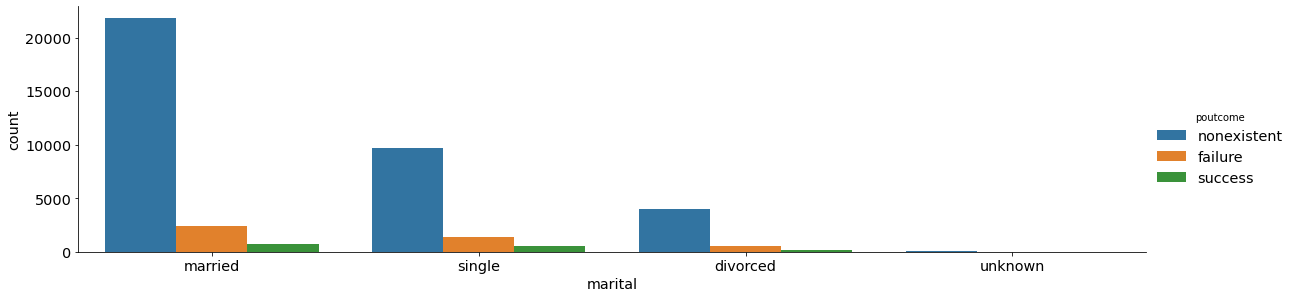

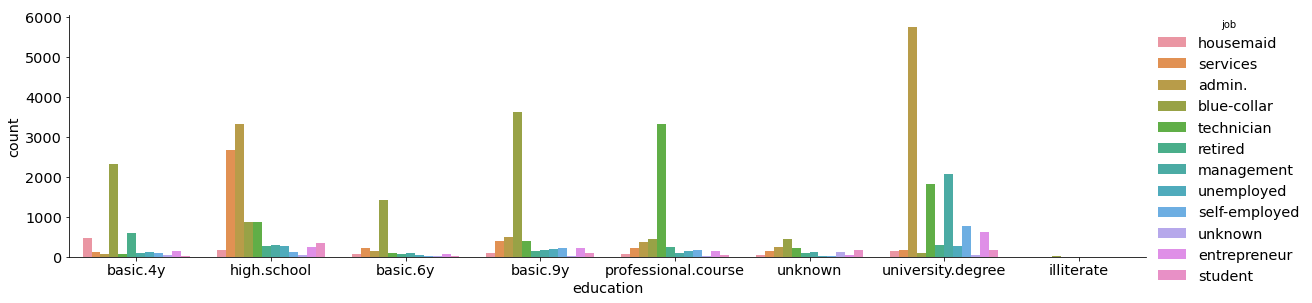

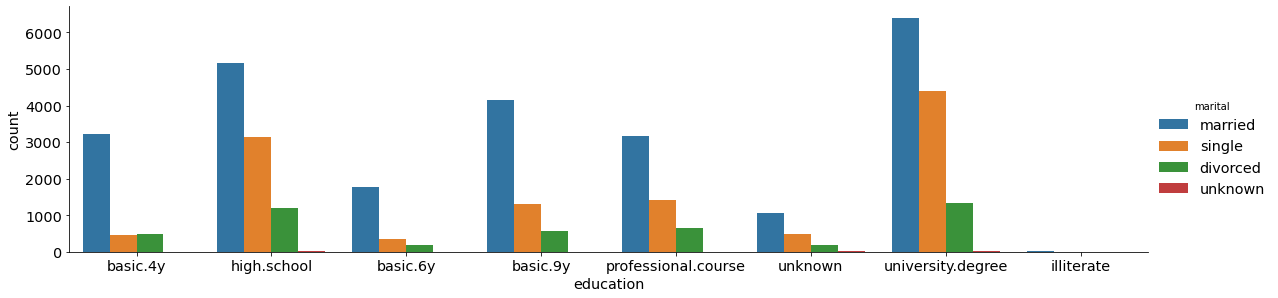

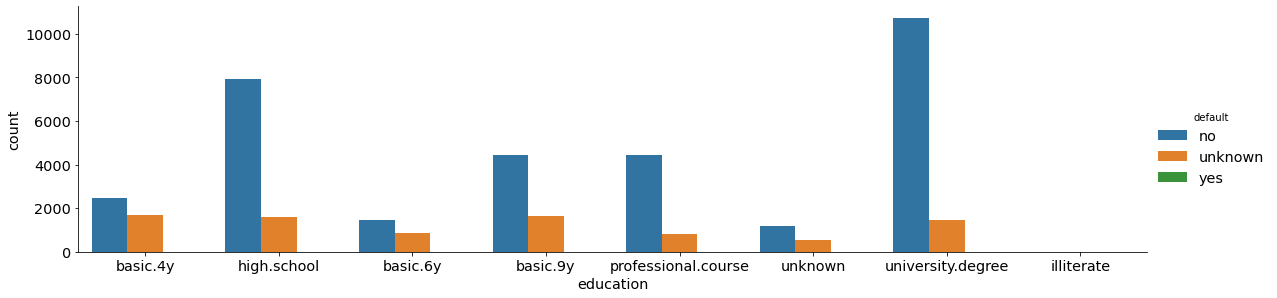

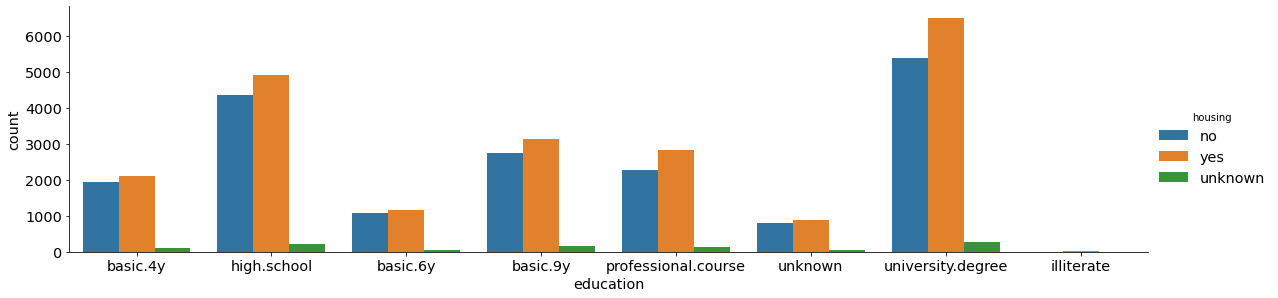

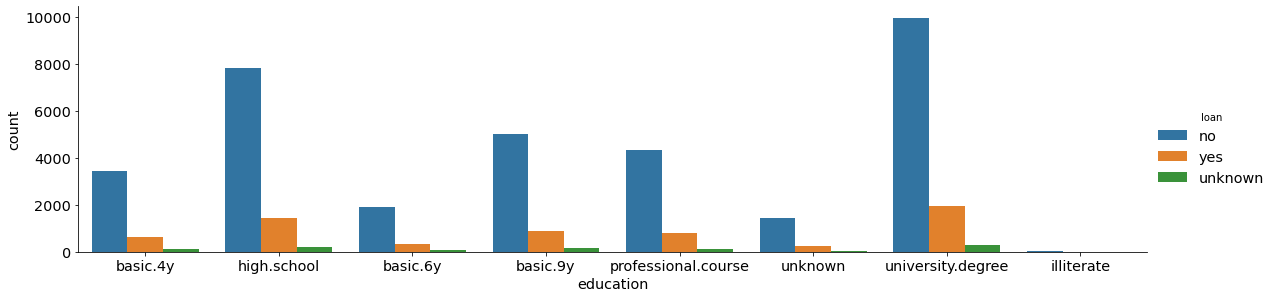

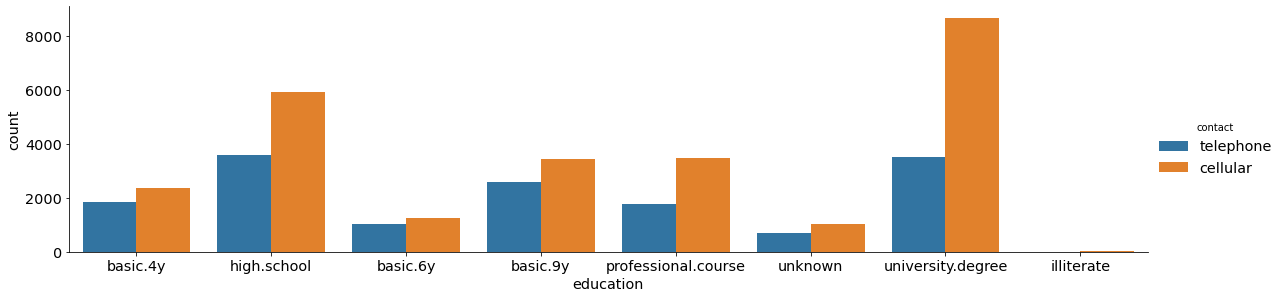

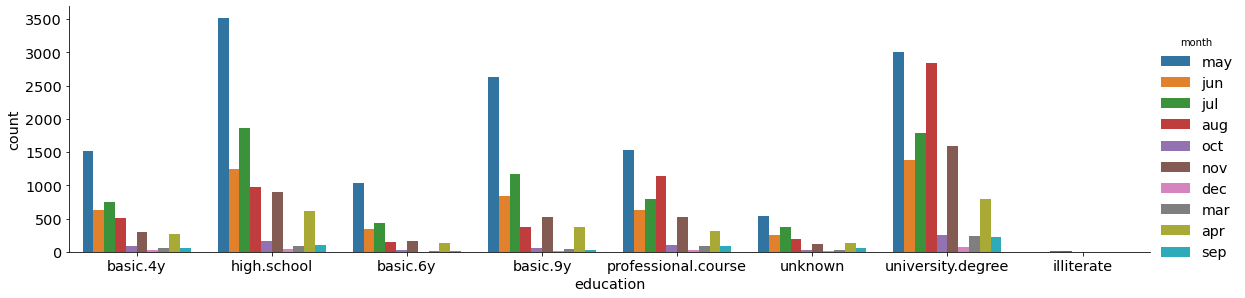

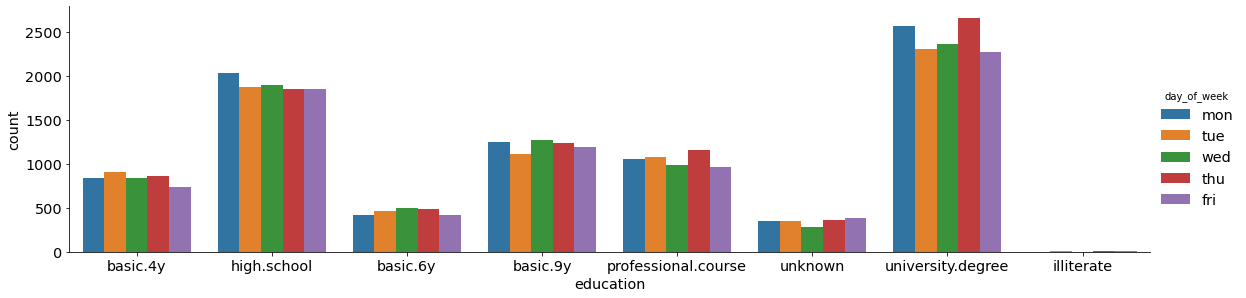

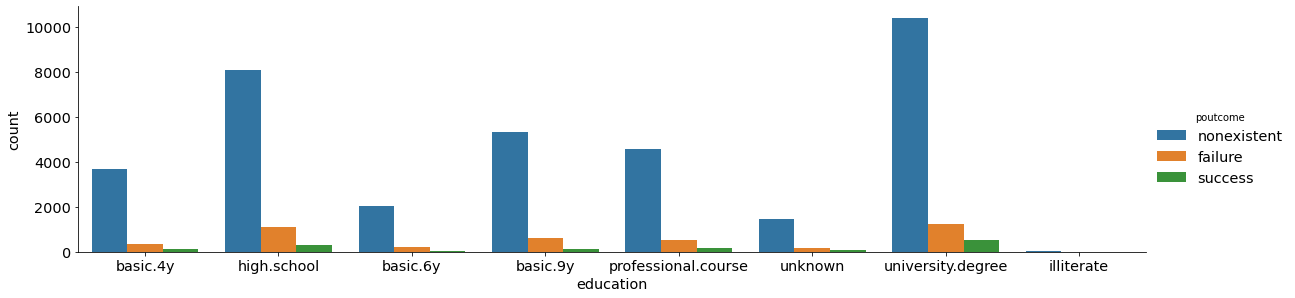

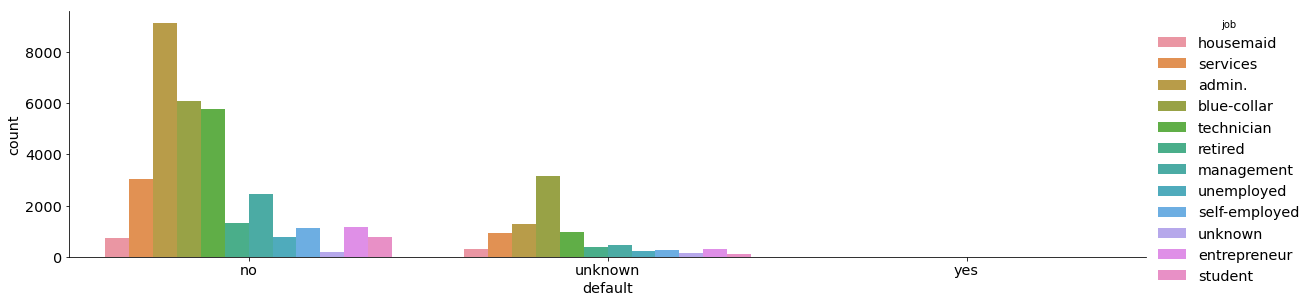

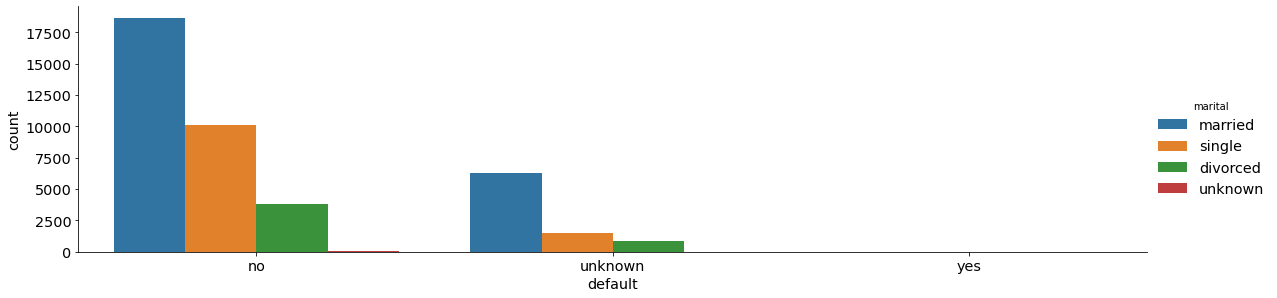

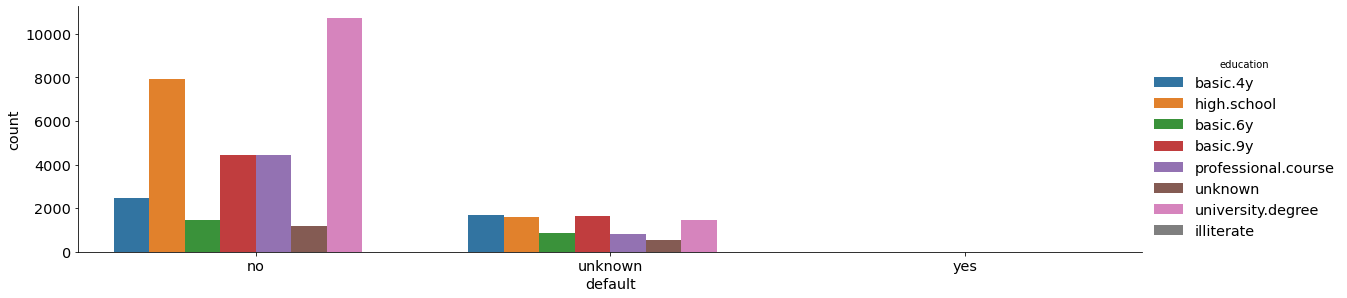

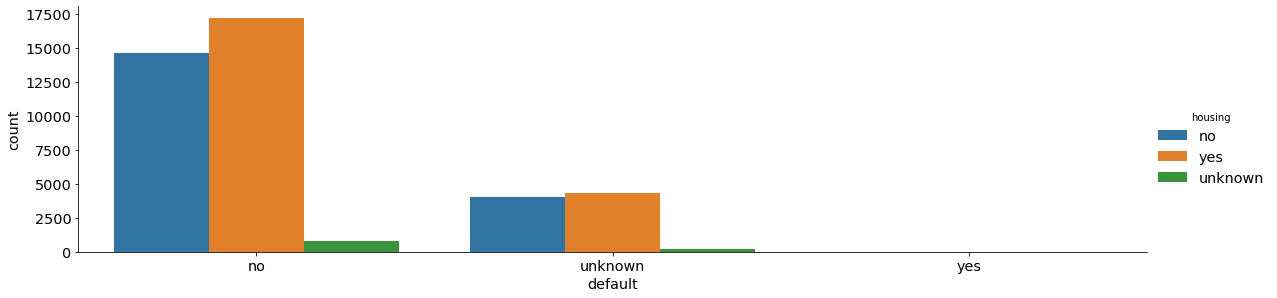

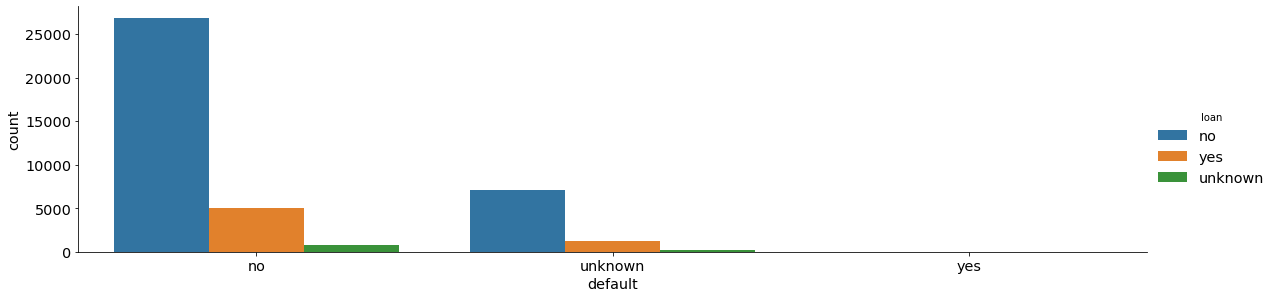

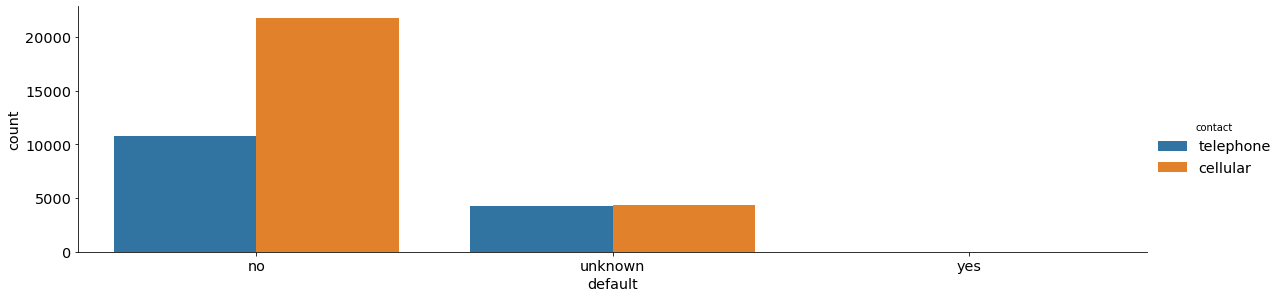

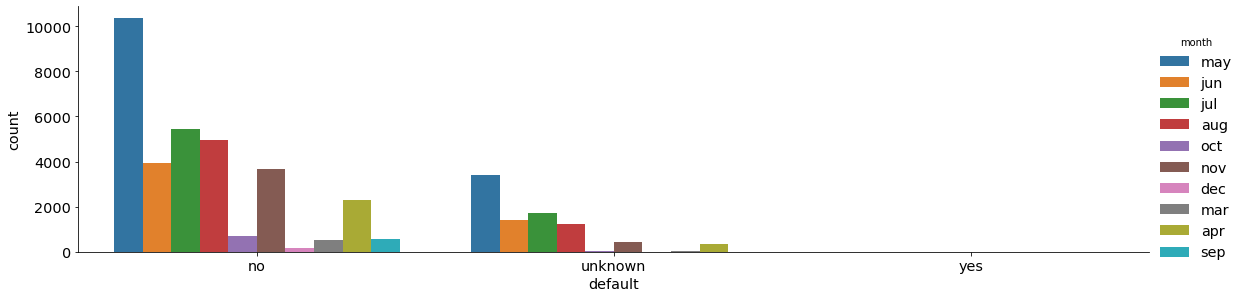

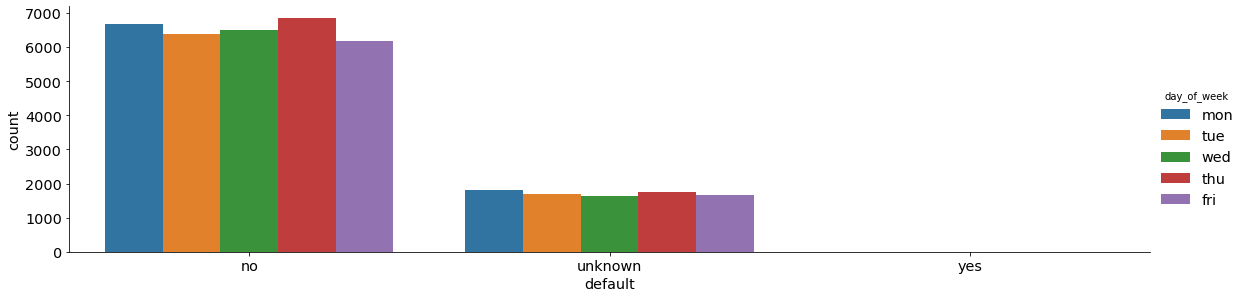

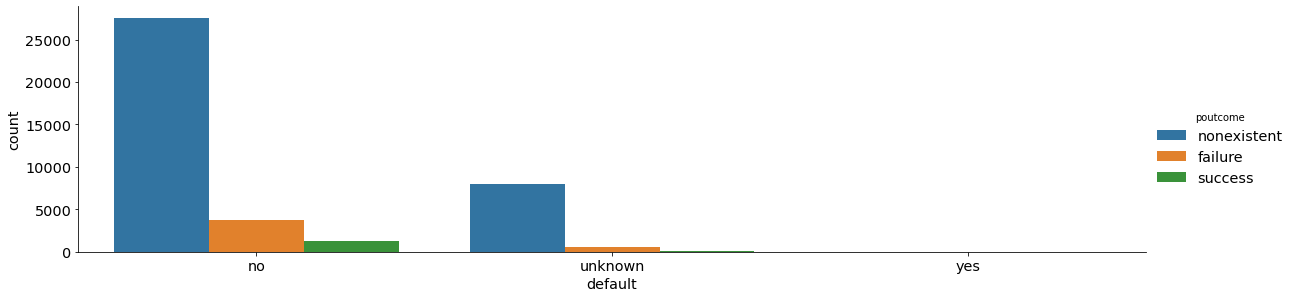

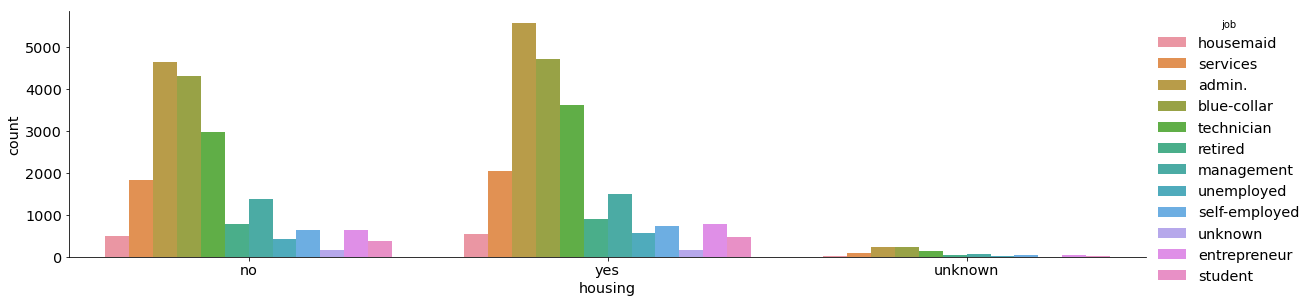

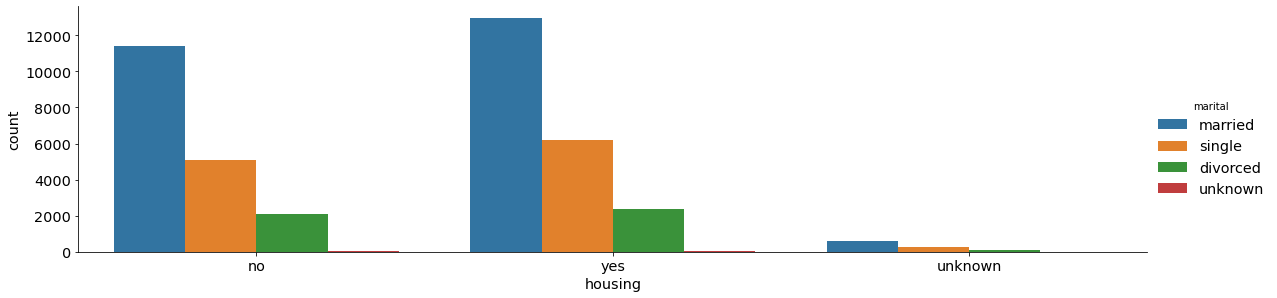

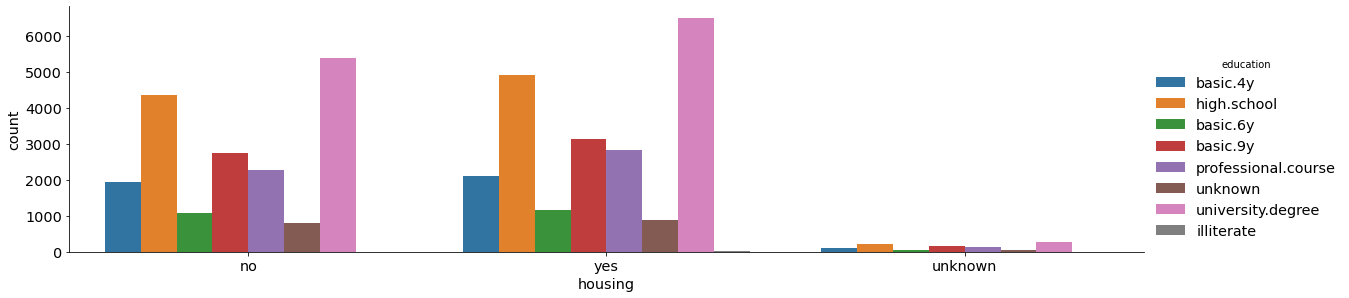

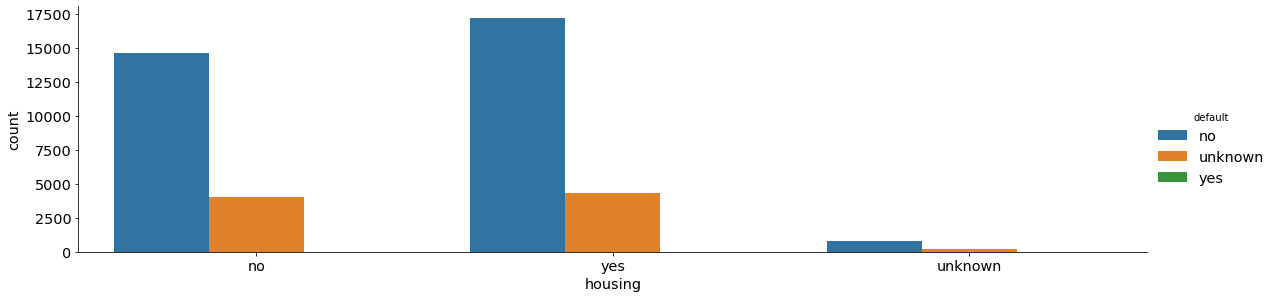

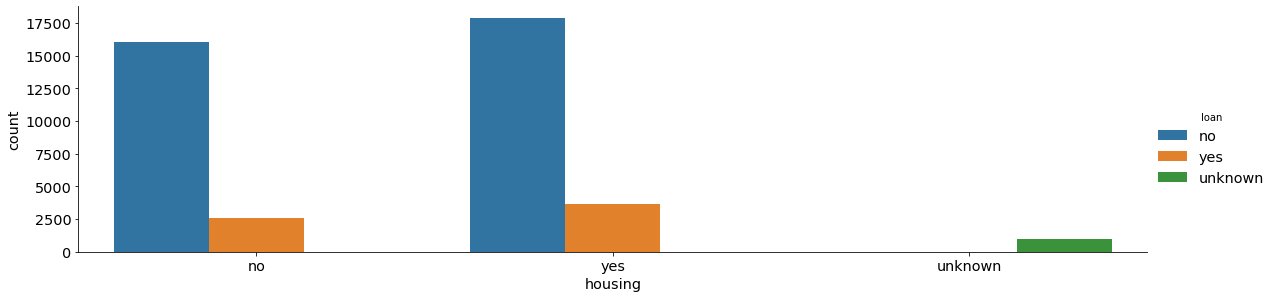

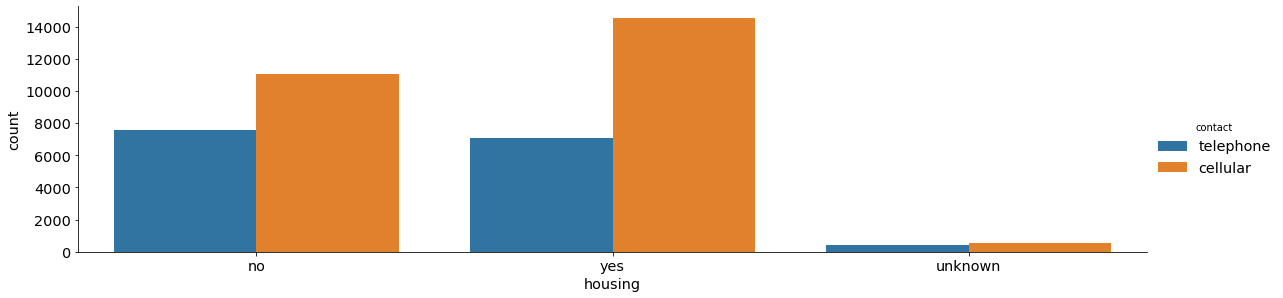

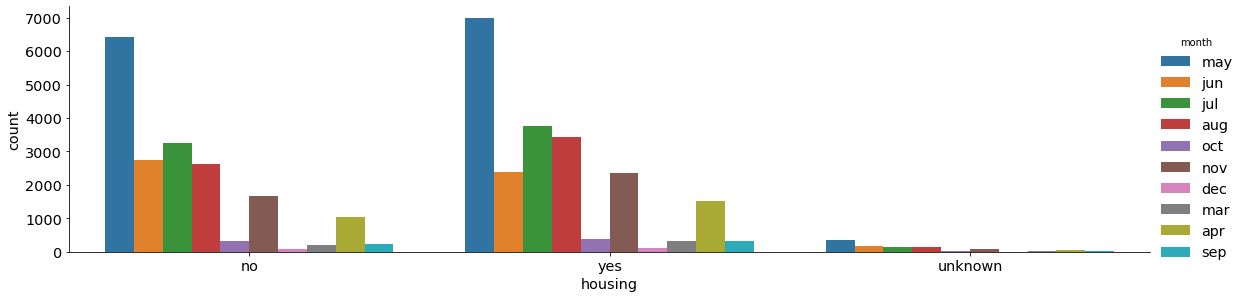

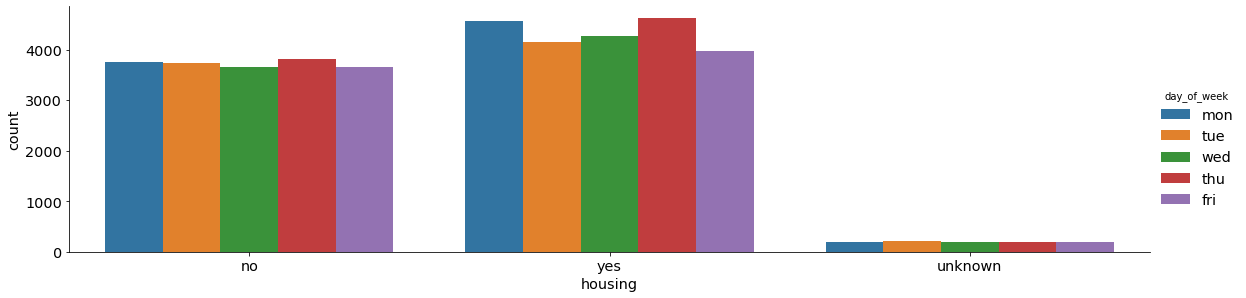

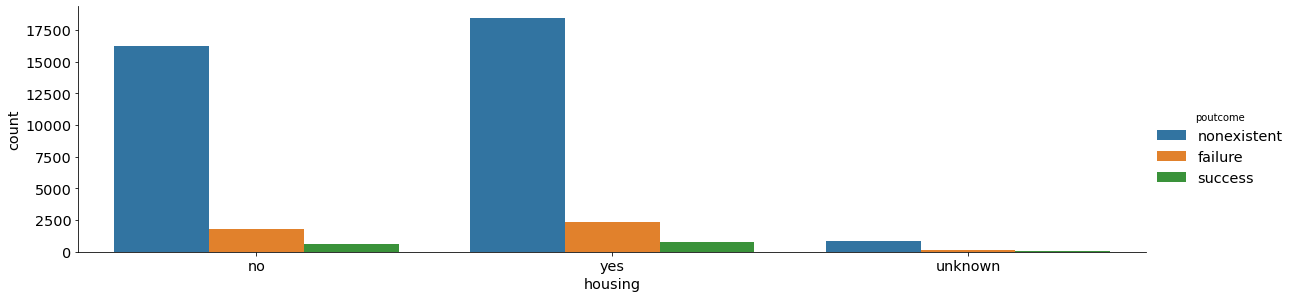

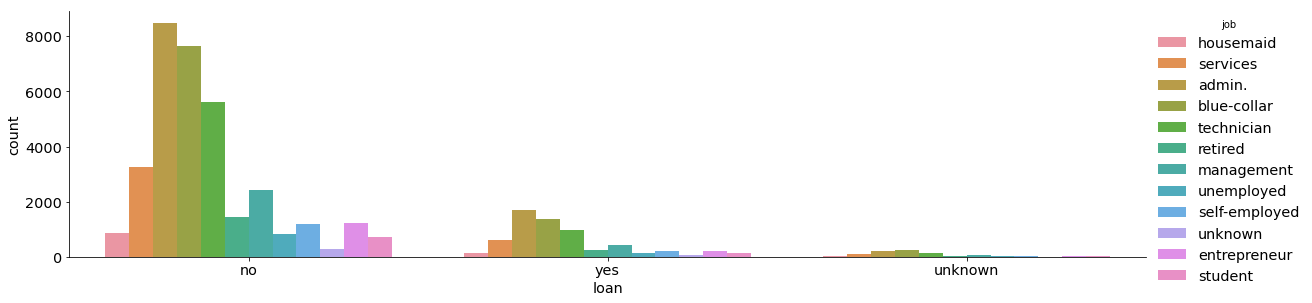

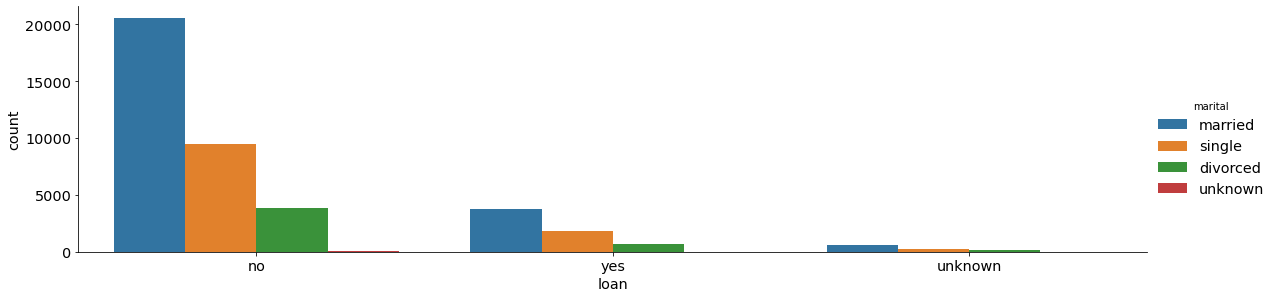

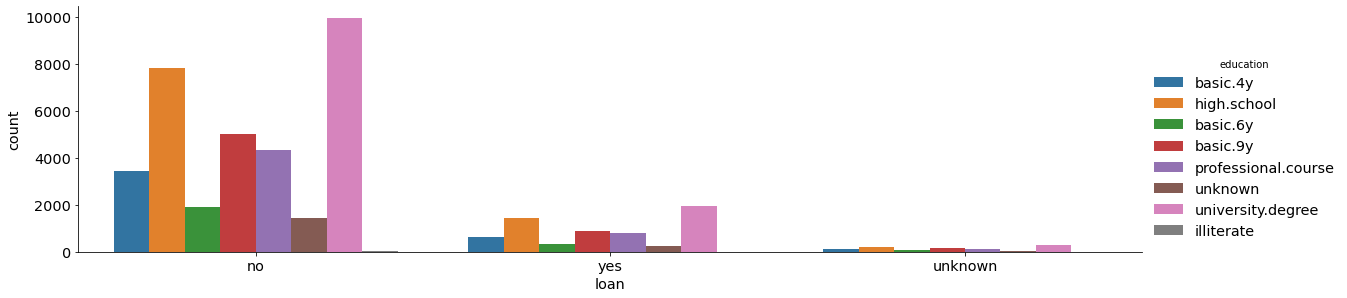

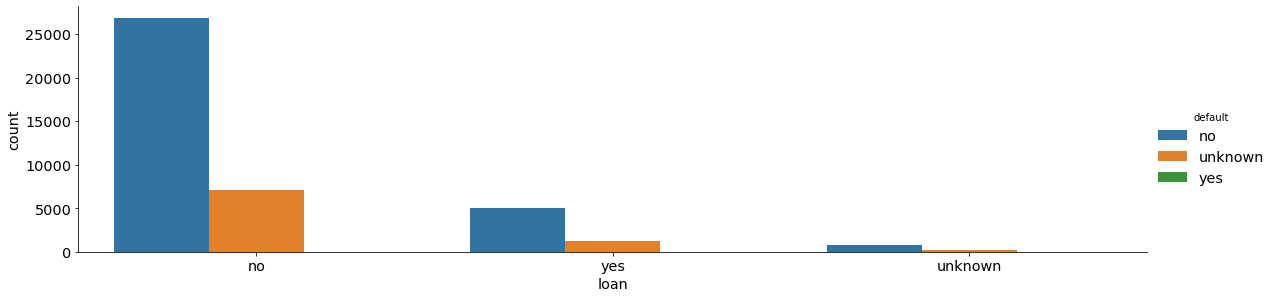

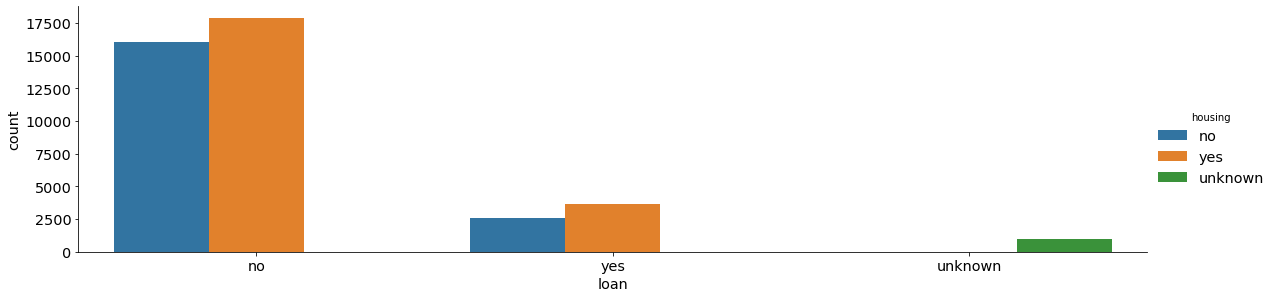

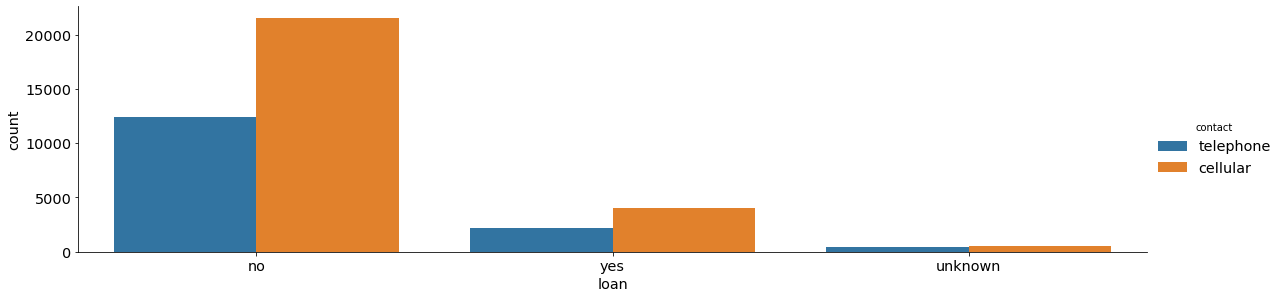

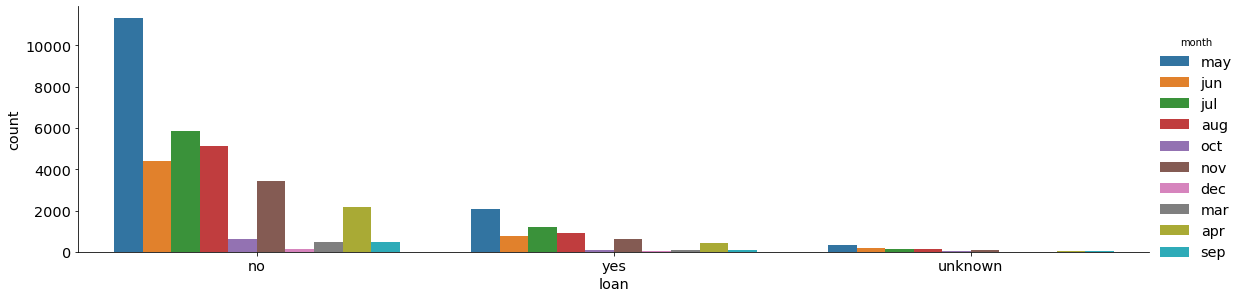

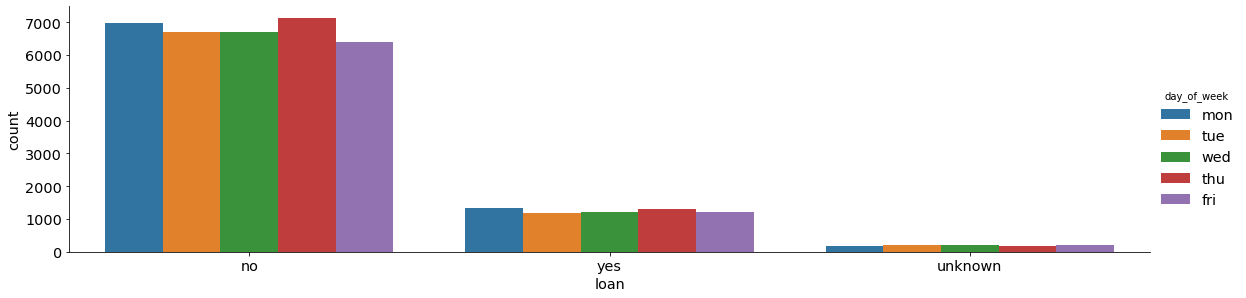

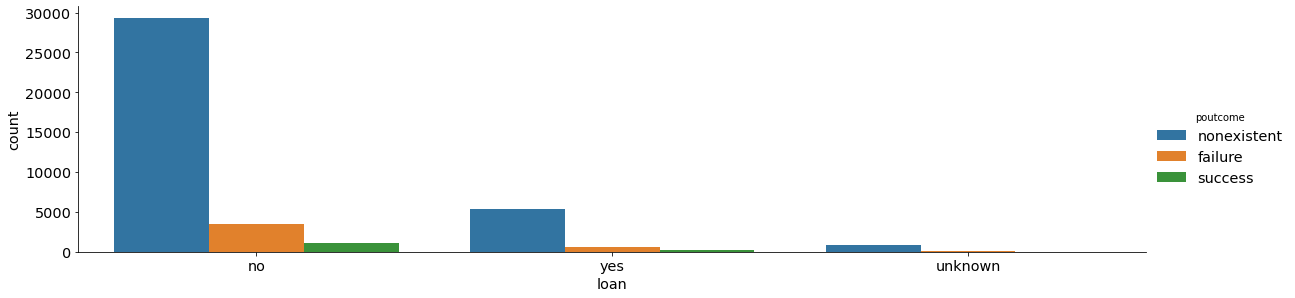

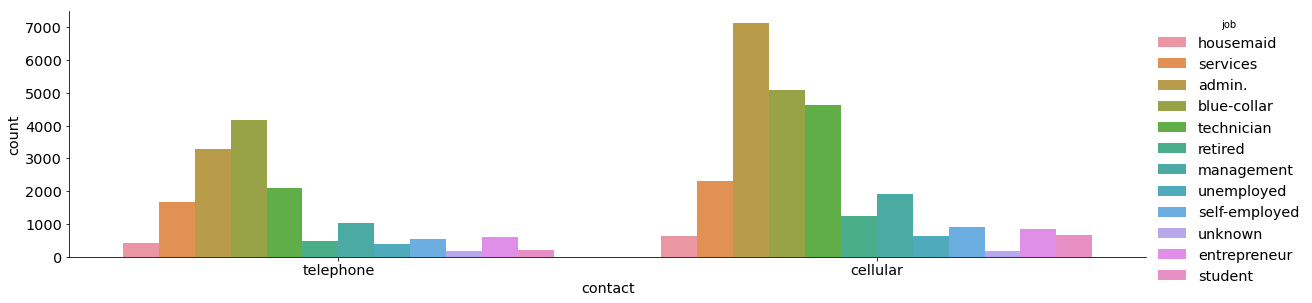

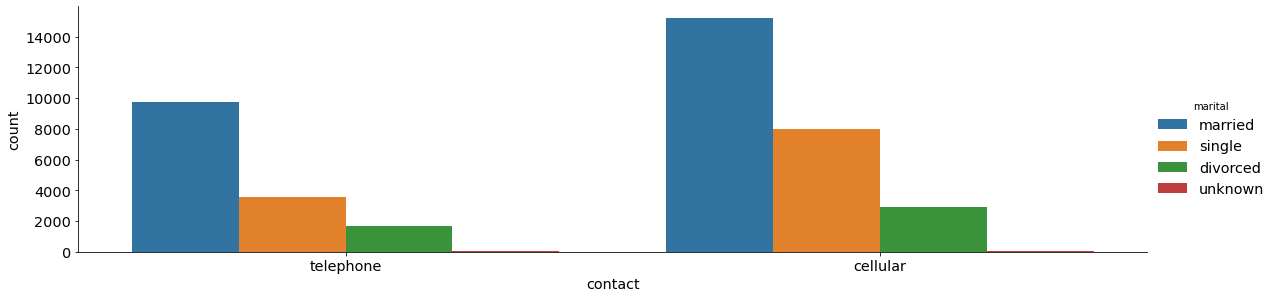

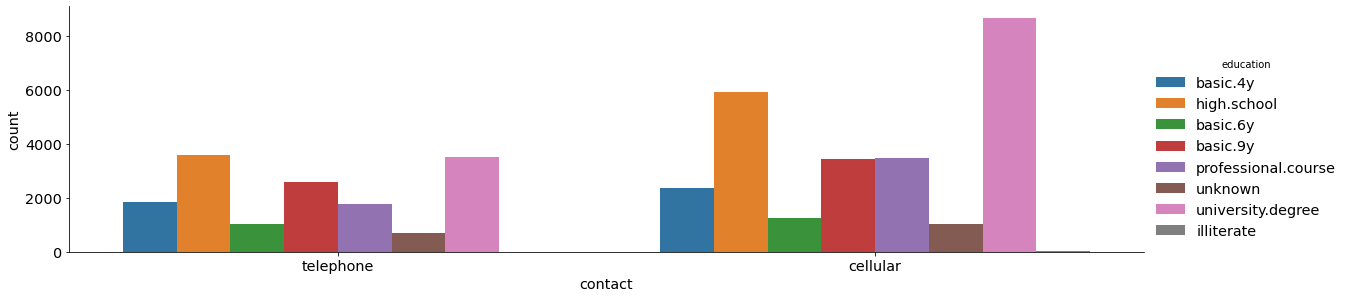

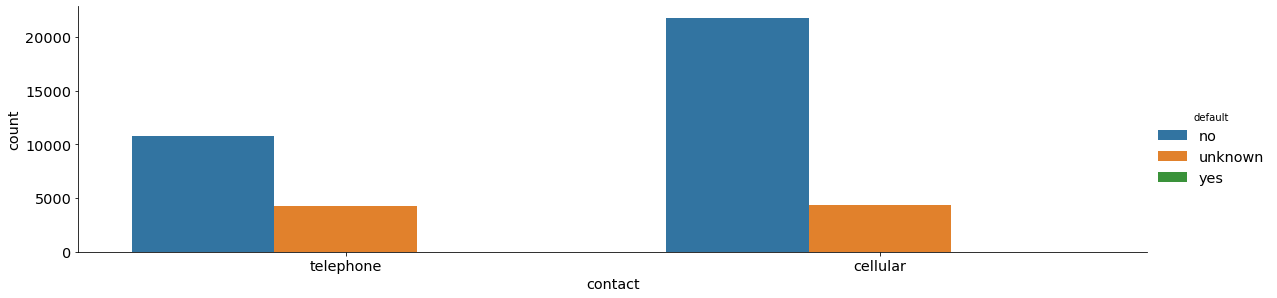

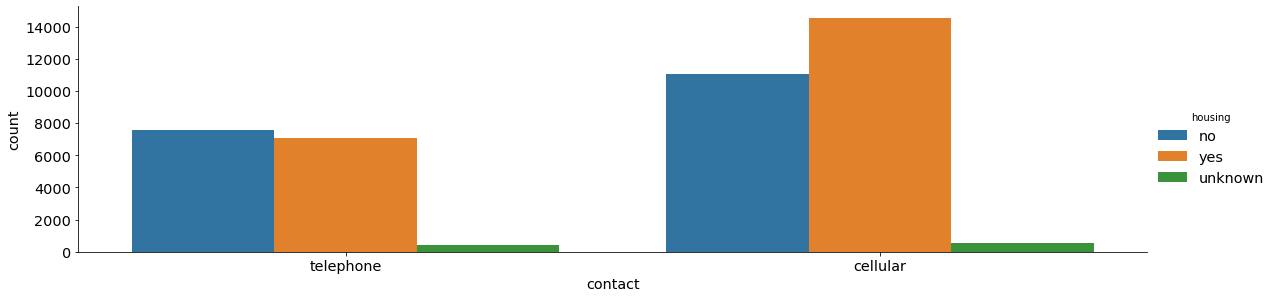

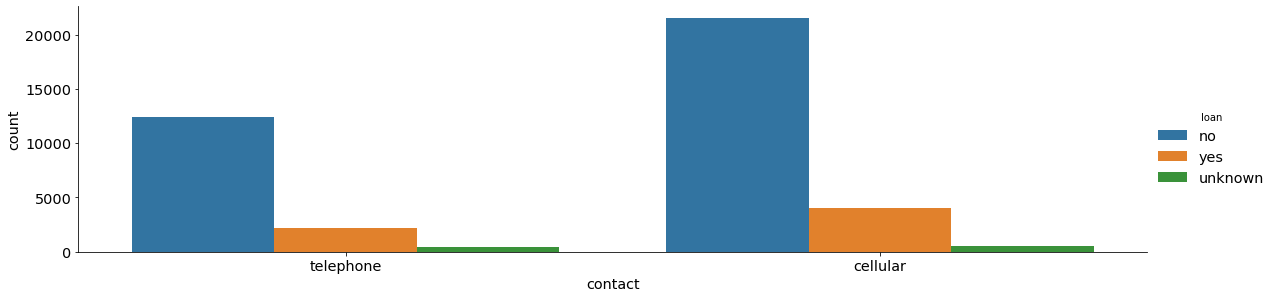

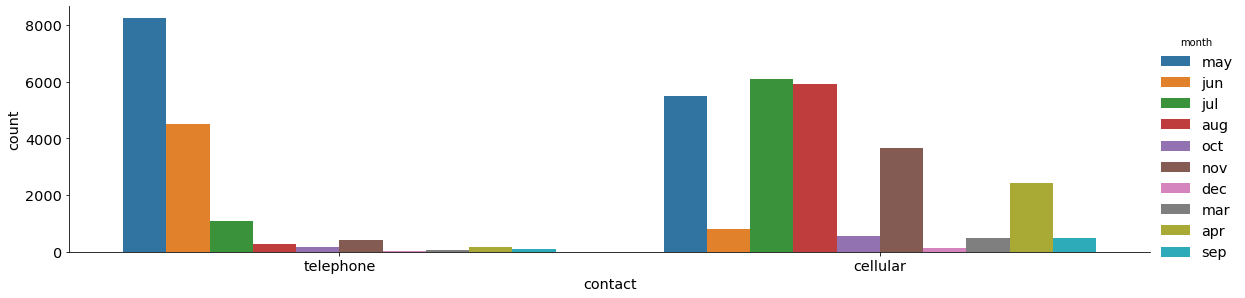

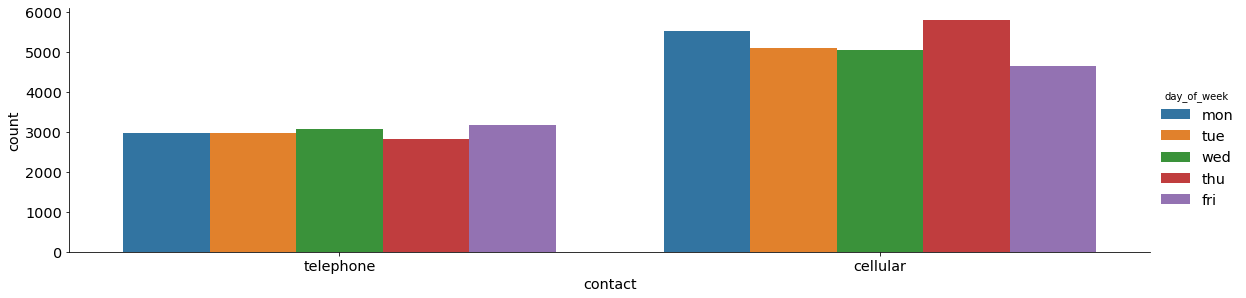

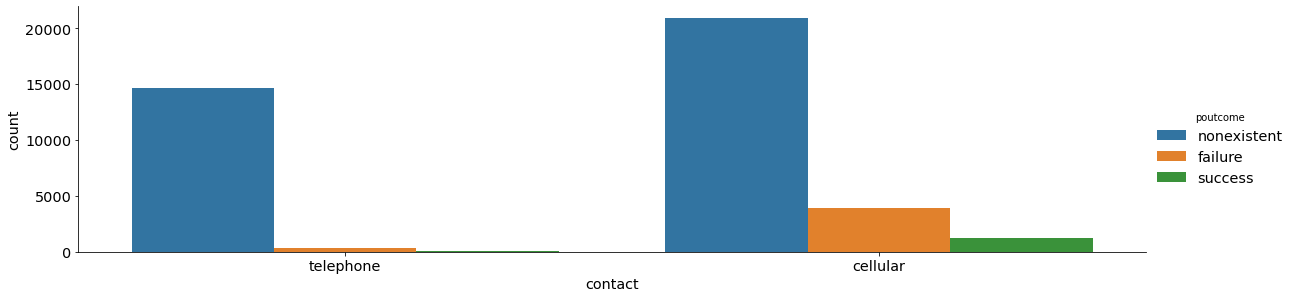

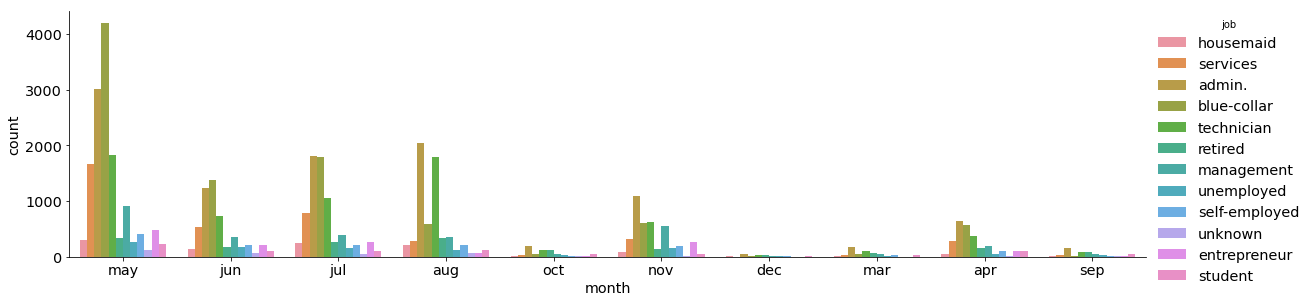

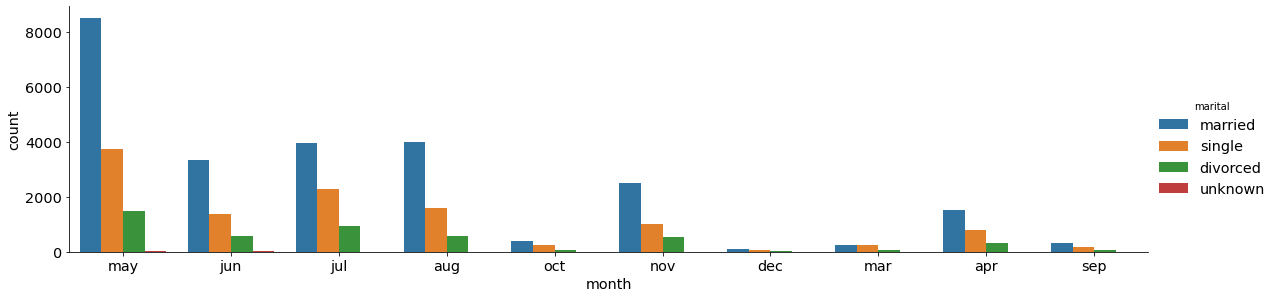

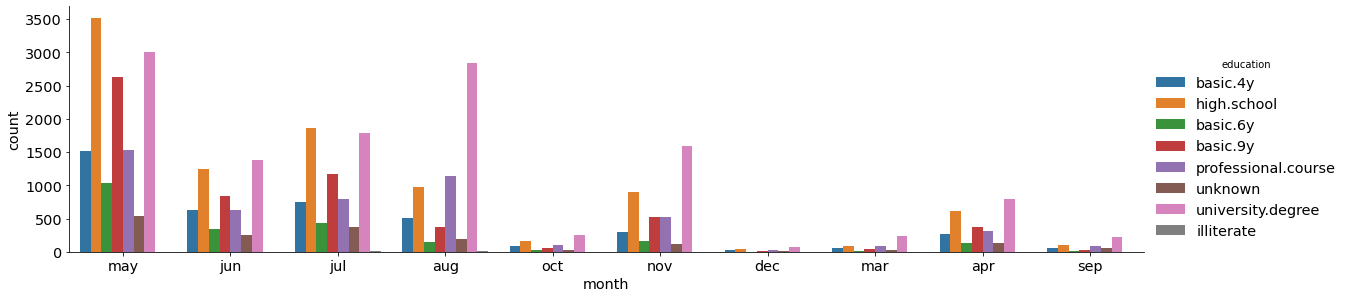

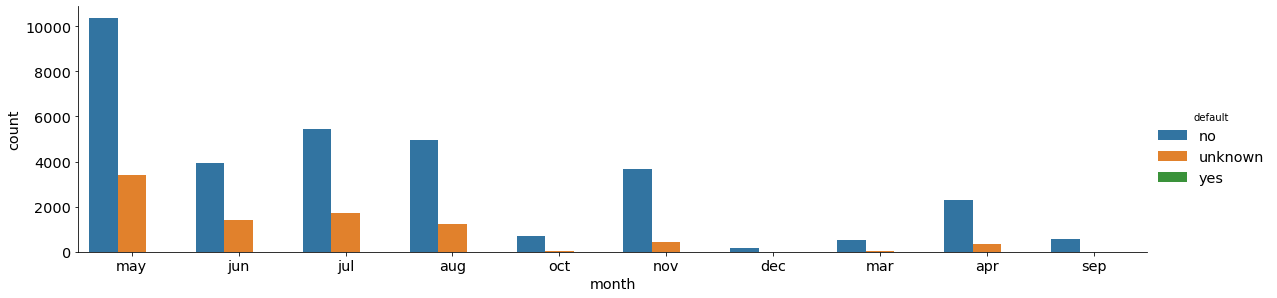

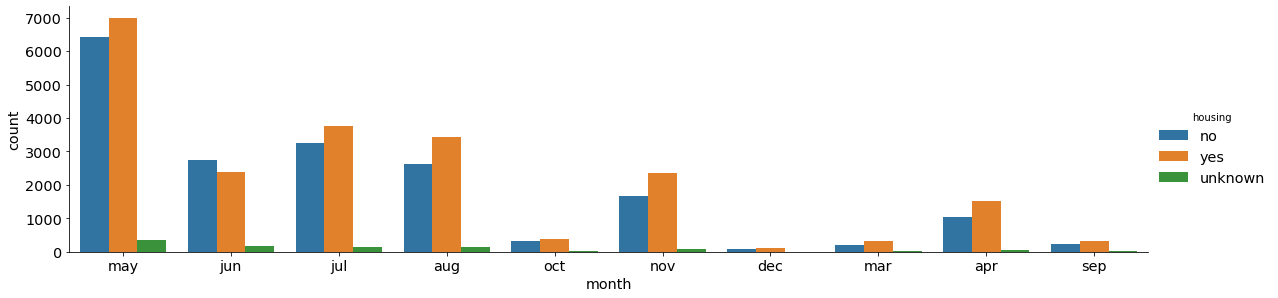

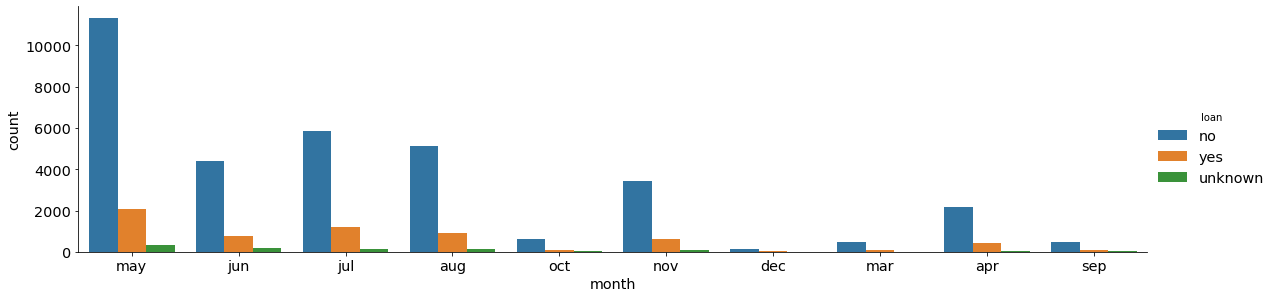

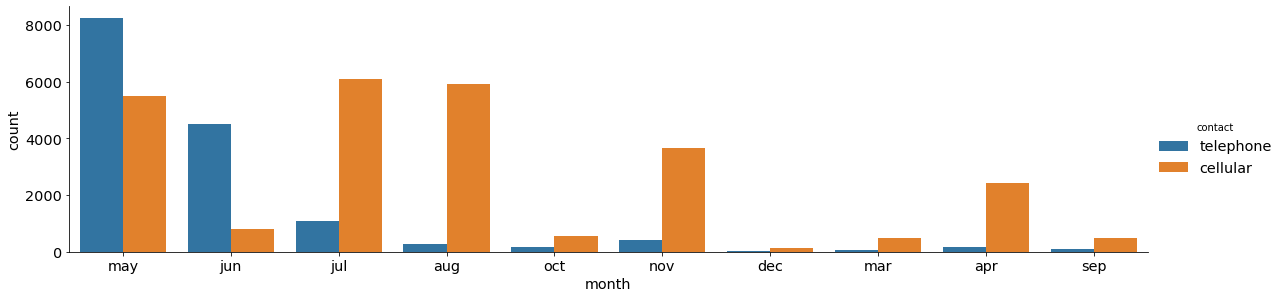

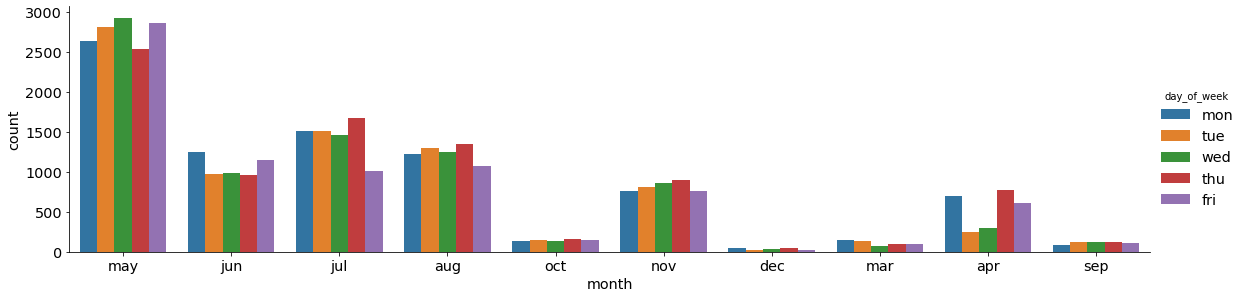

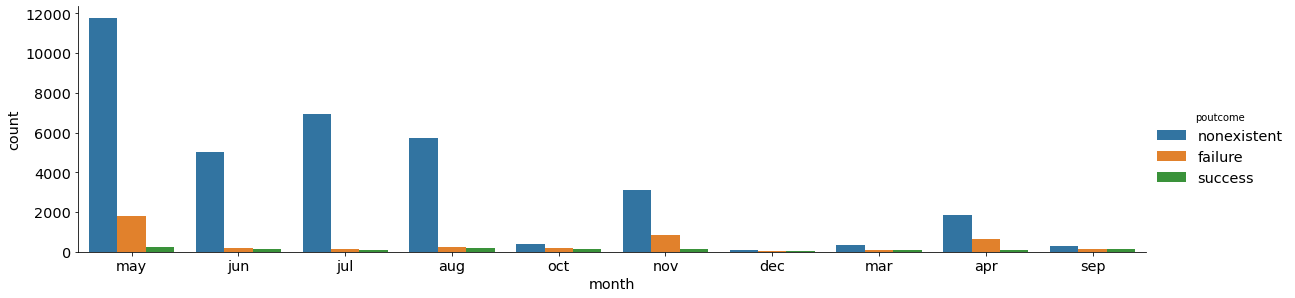

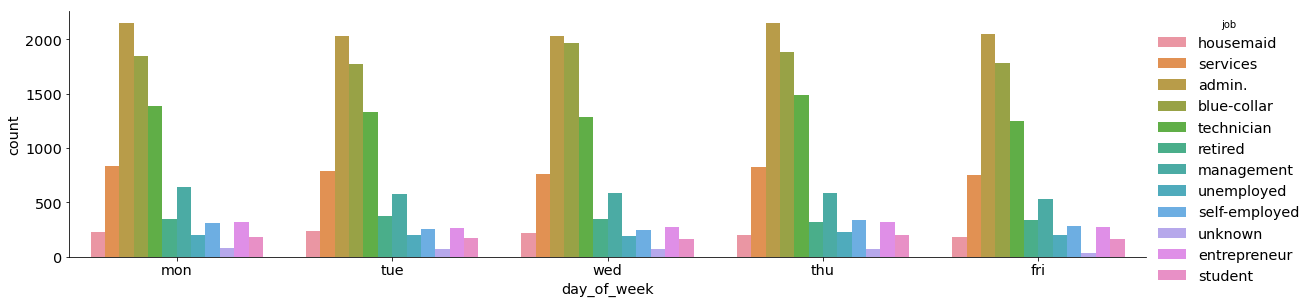

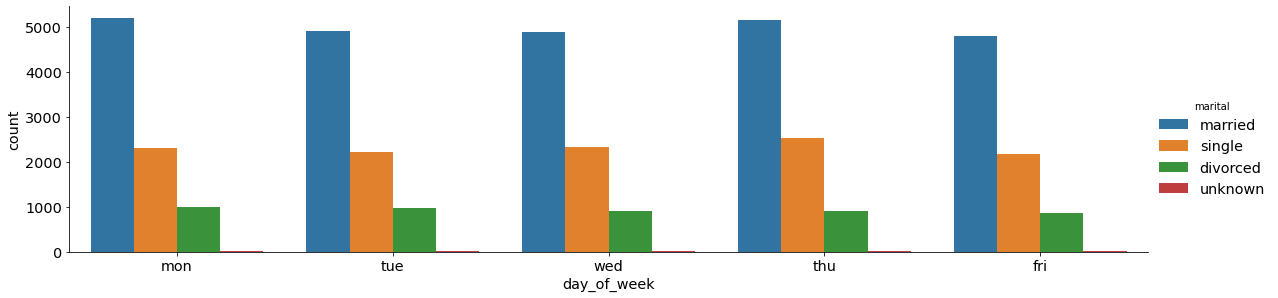

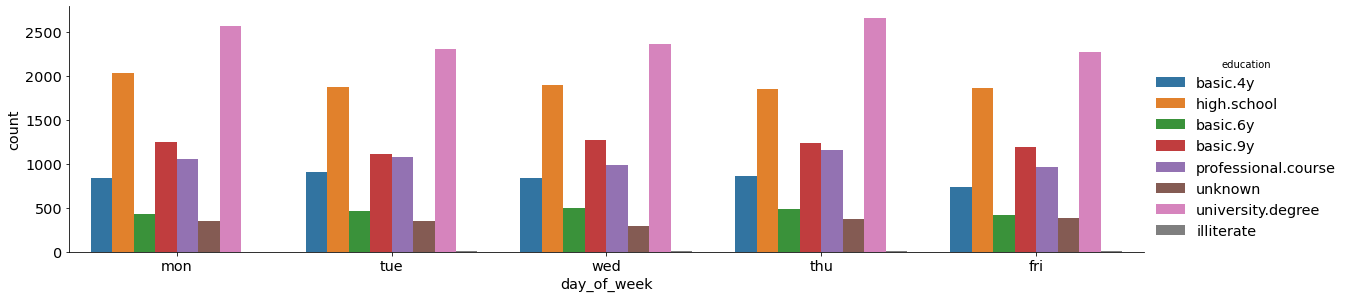

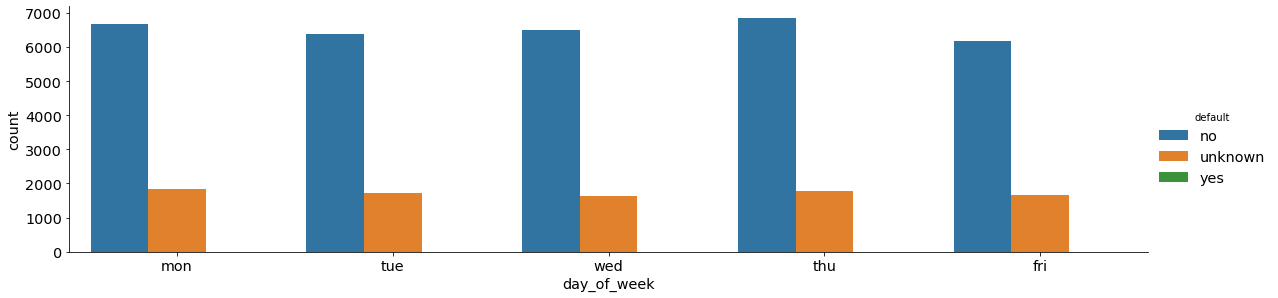

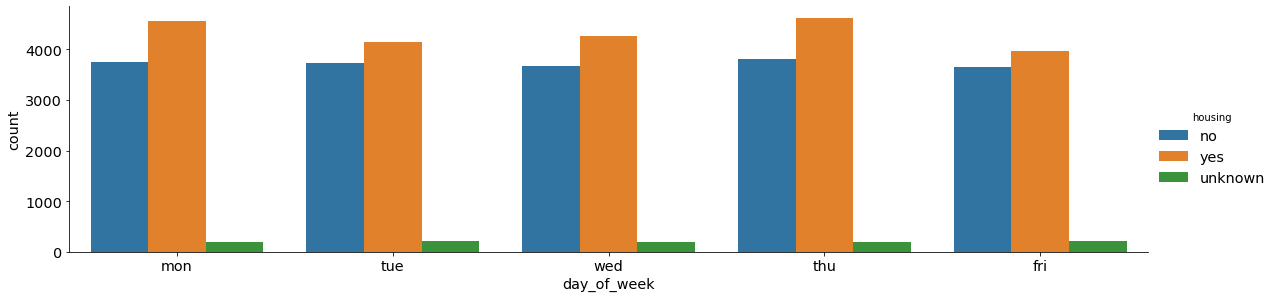

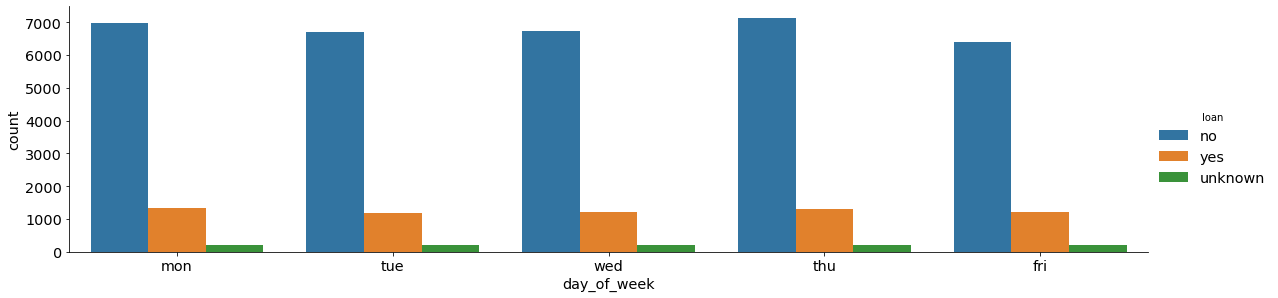

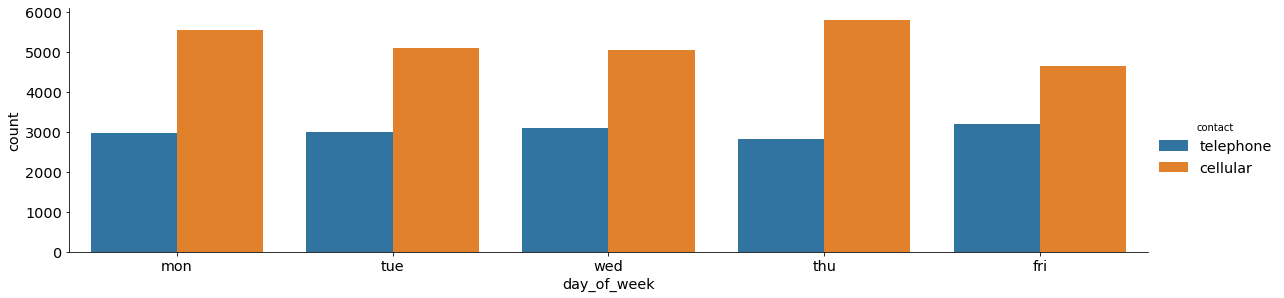

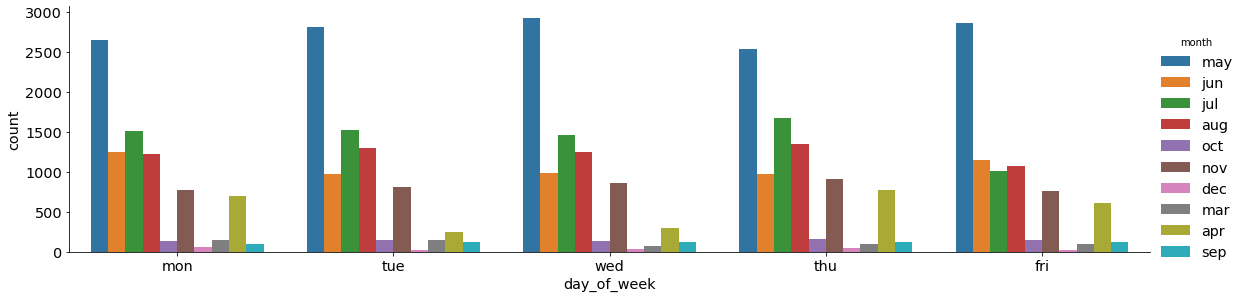

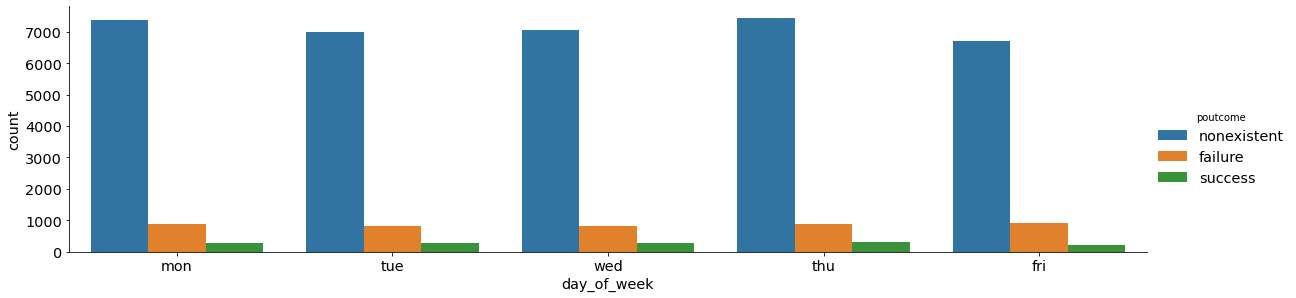

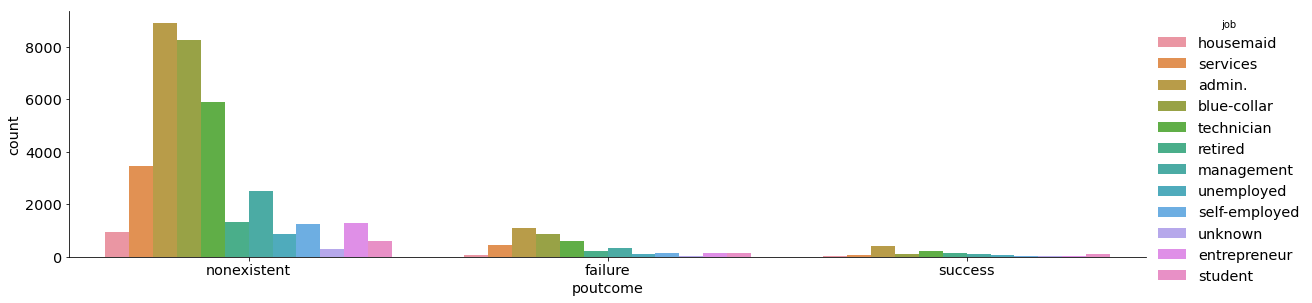

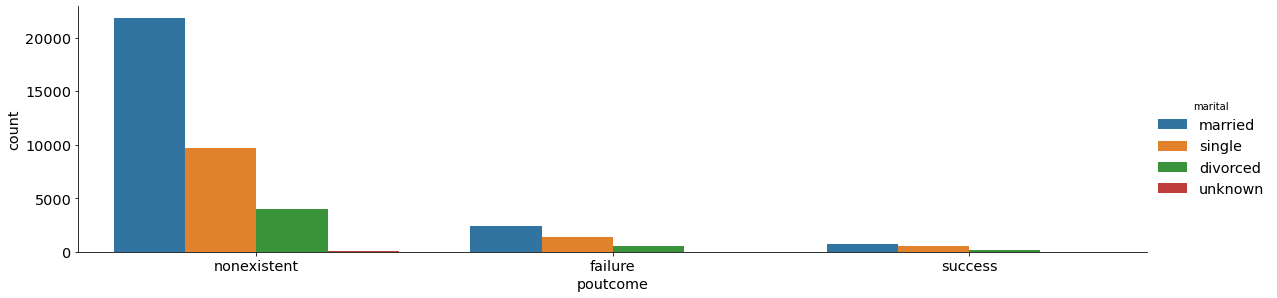

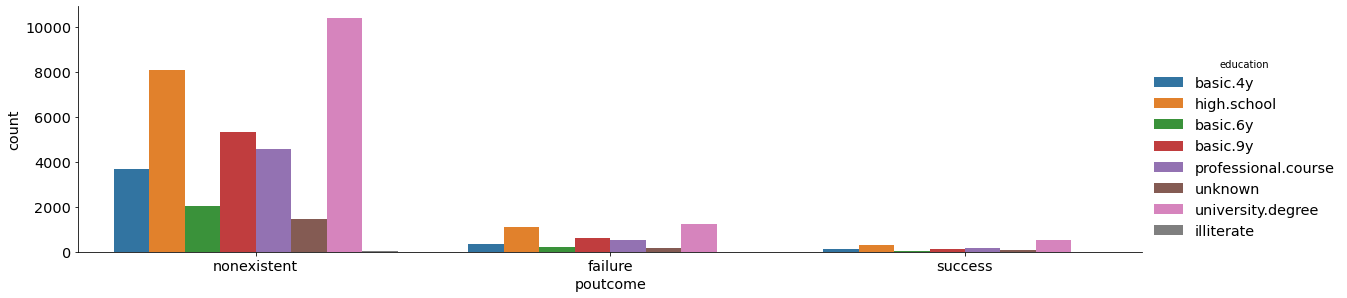

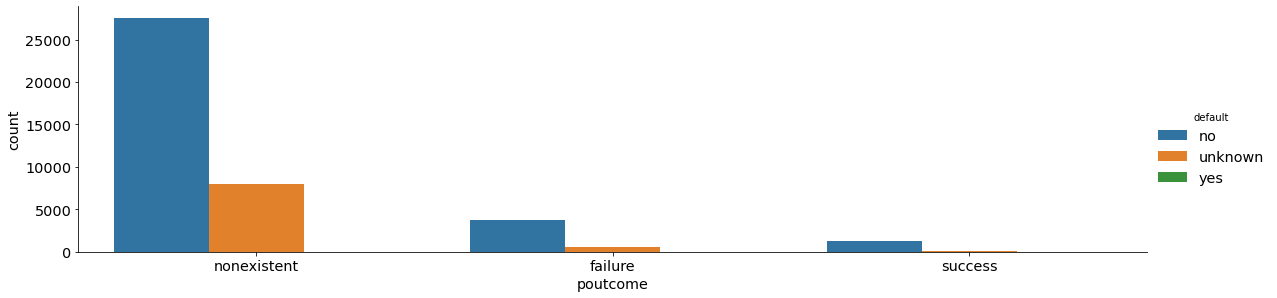

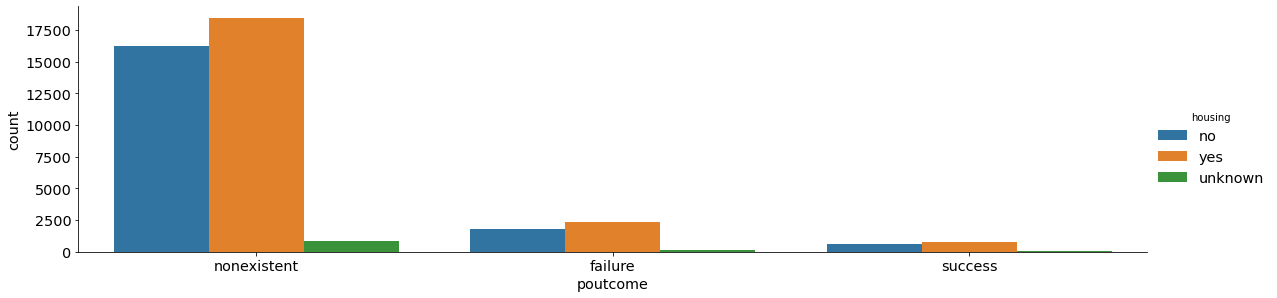

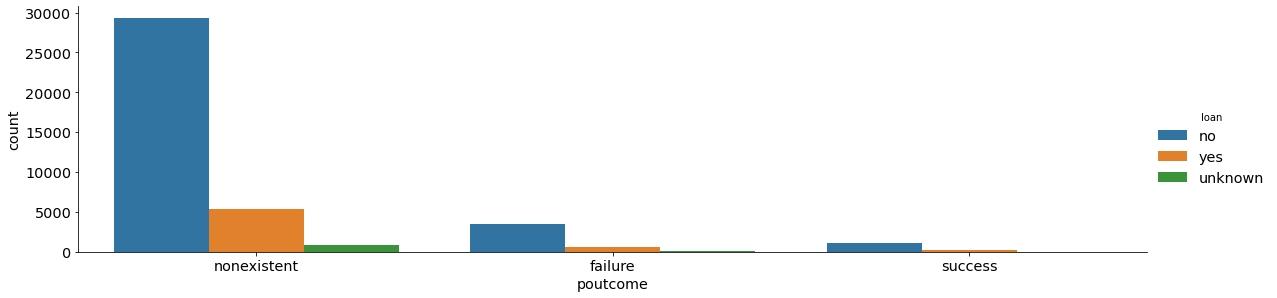

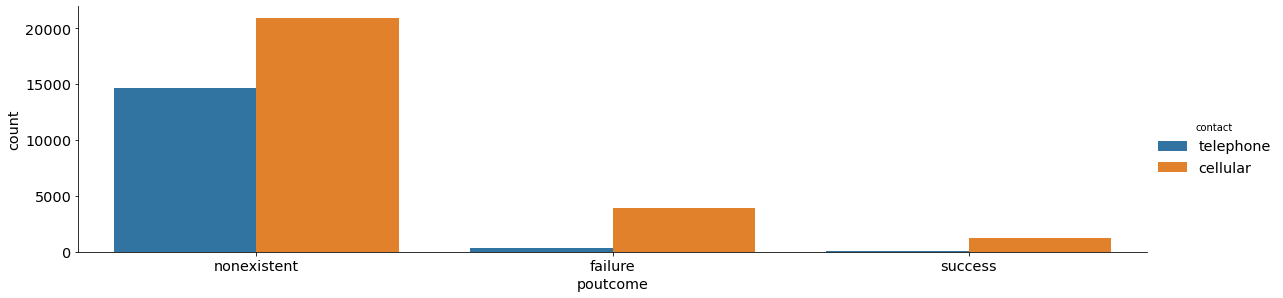

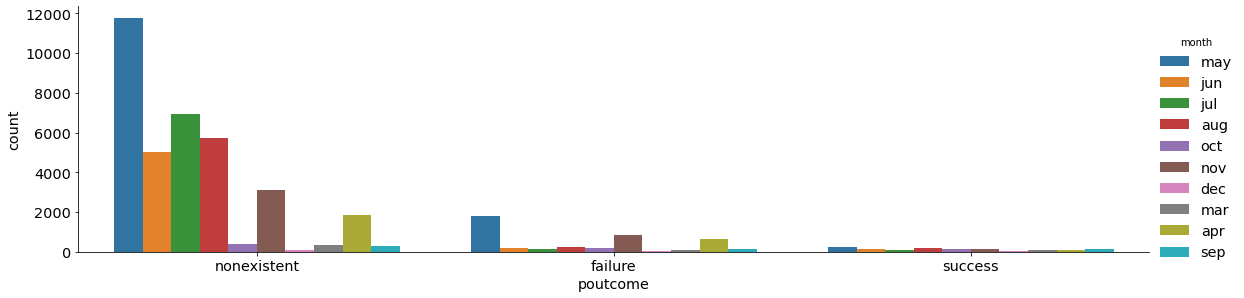

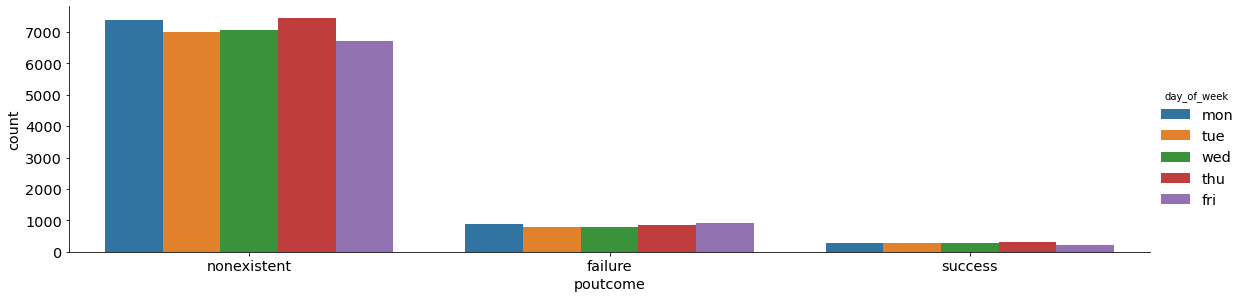

In [246]:
counter=[]

for column1 in columns_cat:
  for column2 in columns_cat:
    if column1!=column2 and [column1,column2] not in counter: 
      sns.catplot(x=column1,hue=column2, data=main_data,height=4, aspect=4,kind='count')
      counter.append([column1,column2])


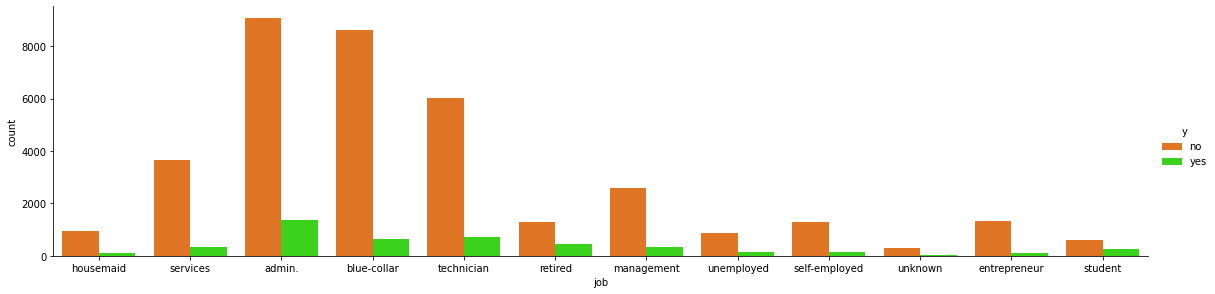

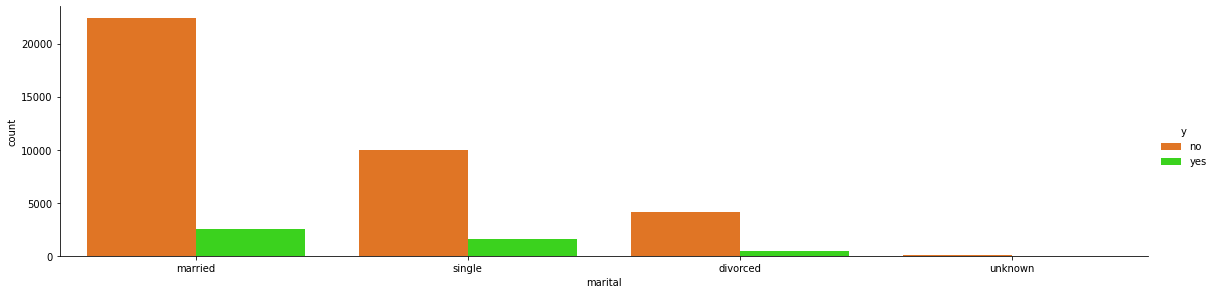

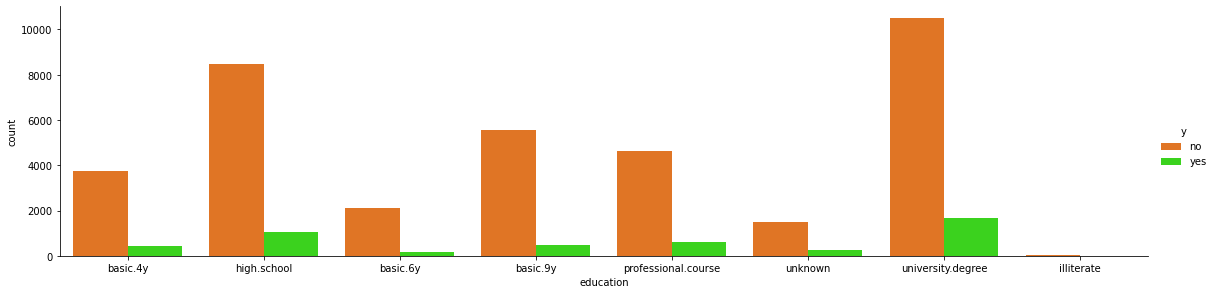

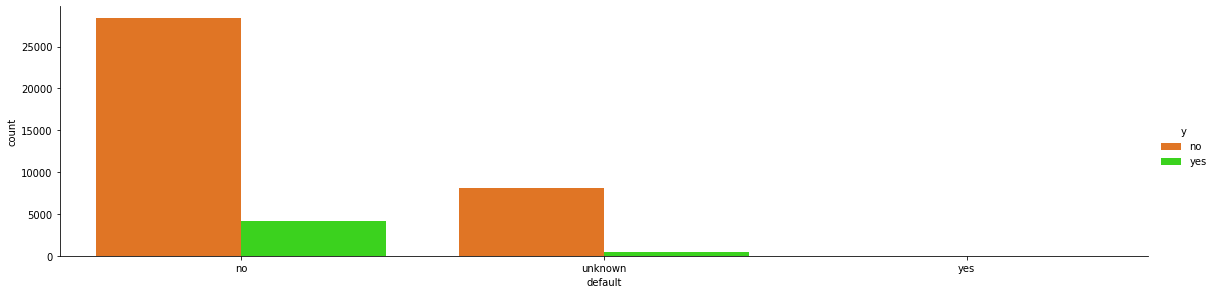

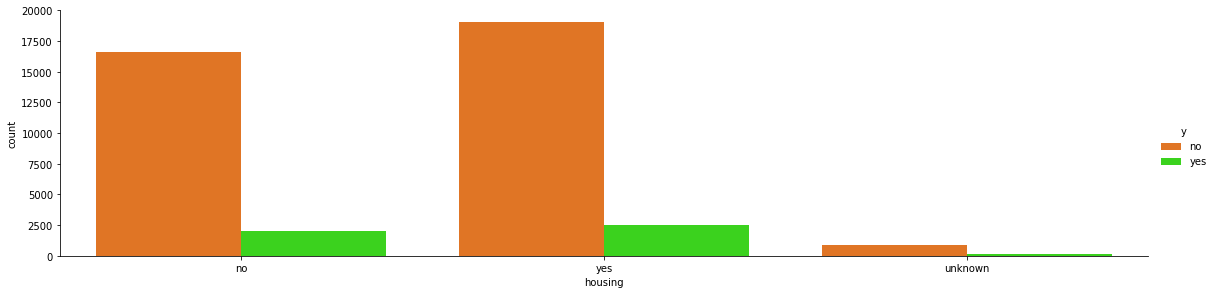

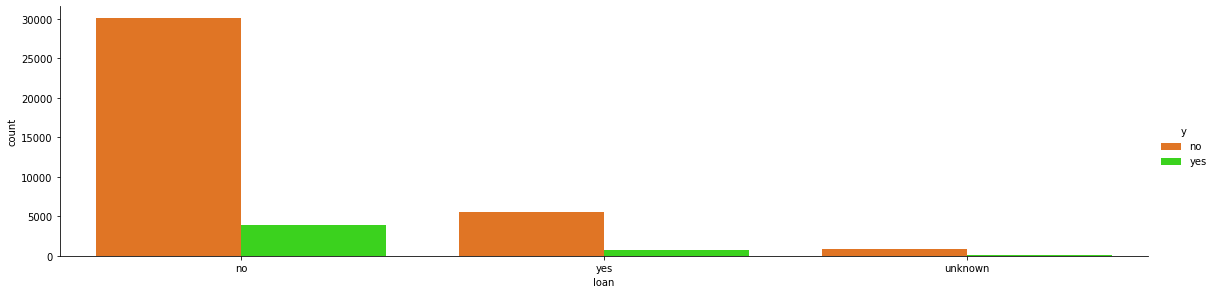

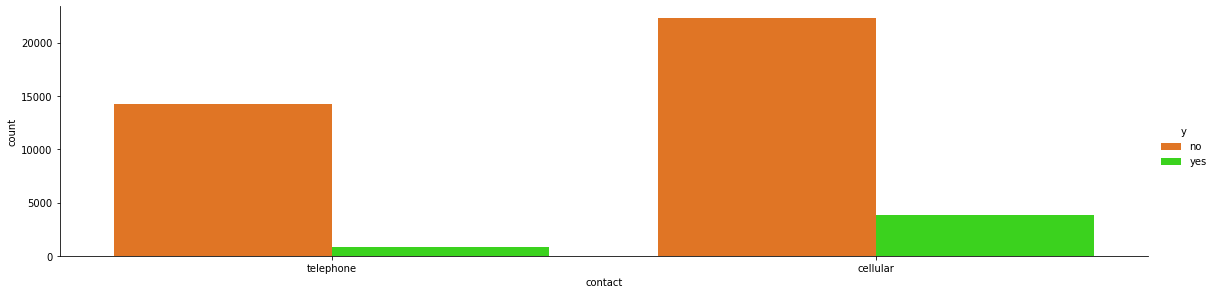

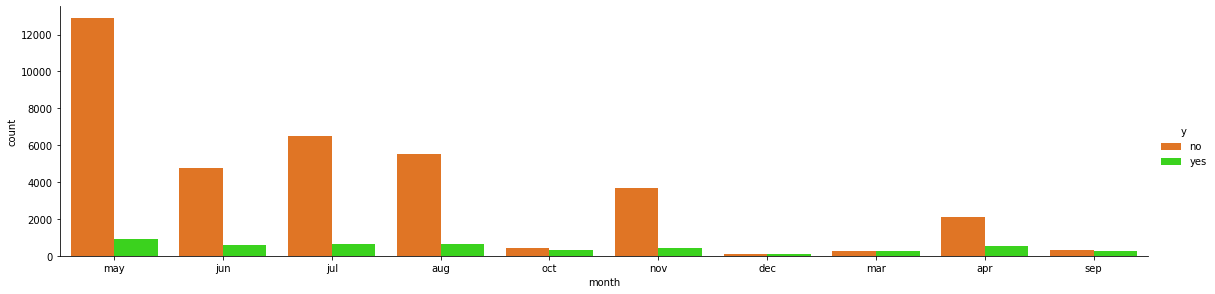

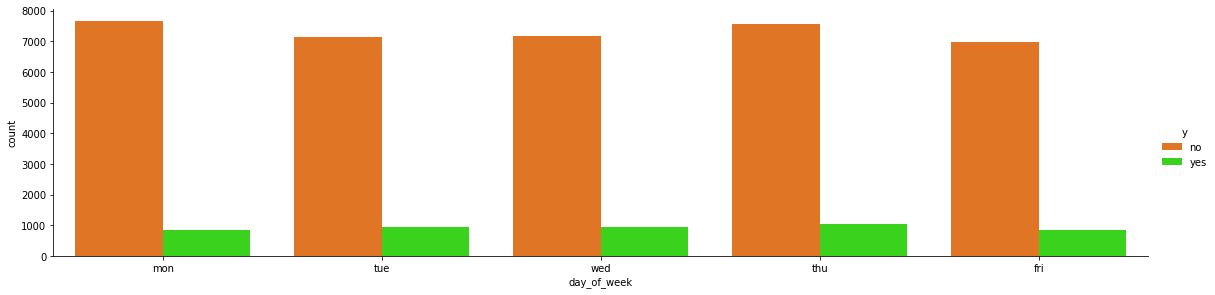

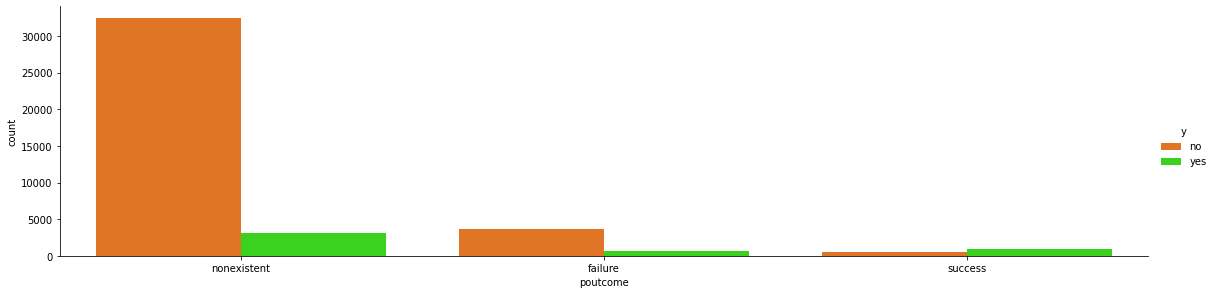

In [ ]:
for column in columns_cat:
  sns.catplot(x=column,hue='y',data=main_data,kind='count',palette="gist_ncar_r",height=4,aspect=4)

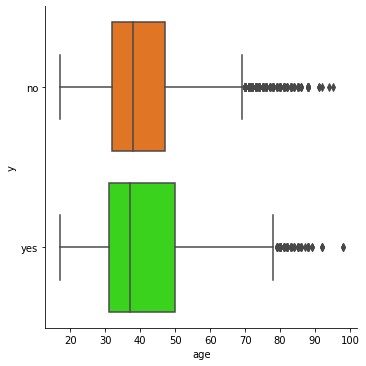

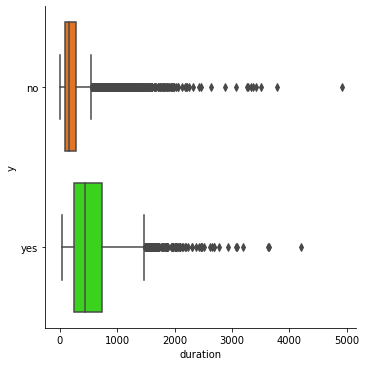

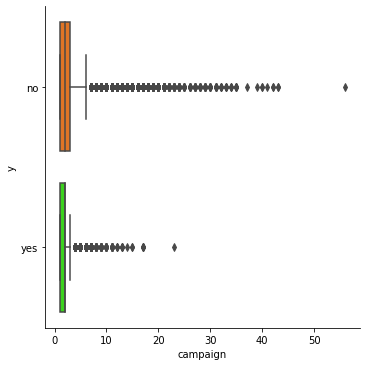

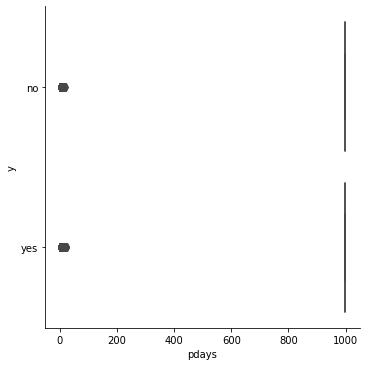

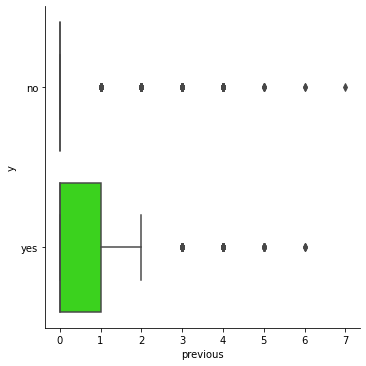

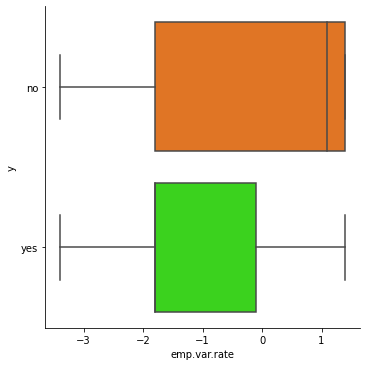

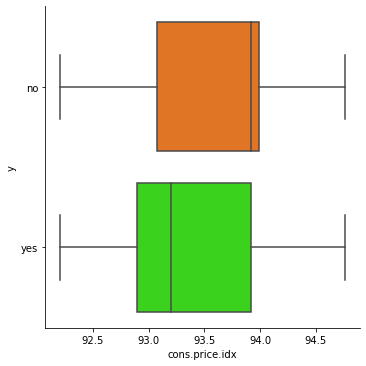

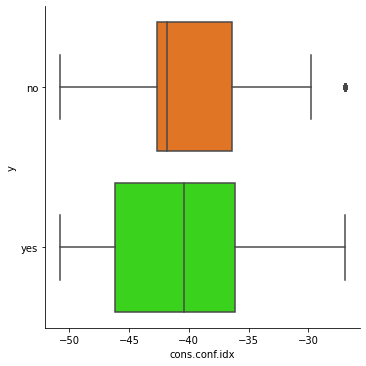

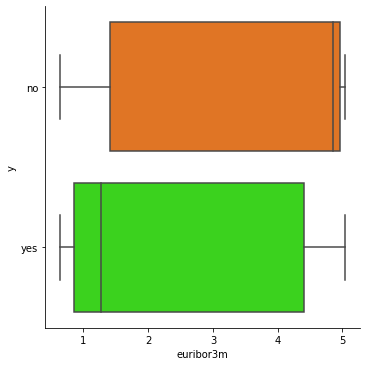

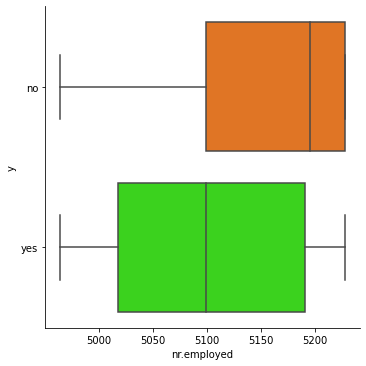

In [ ]:
for column in columns_num:
  sns.catplot(x=column,y='y',data=main_data,kind='box',palette="gist_ncar_r")

<h3><b>F. Feature Selection </b></h3>

In [ ]:
main_data.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
train_columns=['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [ ]:
X= main_data[train_columns].copy()

In [ ]:
#Mapping 
for column in columns_cat:
  mapping = {}
  mapper=X[column].unique()
  for i,name in enumerate(mapper):
    mapping[name]=i
  X[column] = X[column].map(mapping)

In [ ]:
y=main_data['y'].to_numpy()
y = y.reshape(y.shape[0], )
y=pd.Series(y)

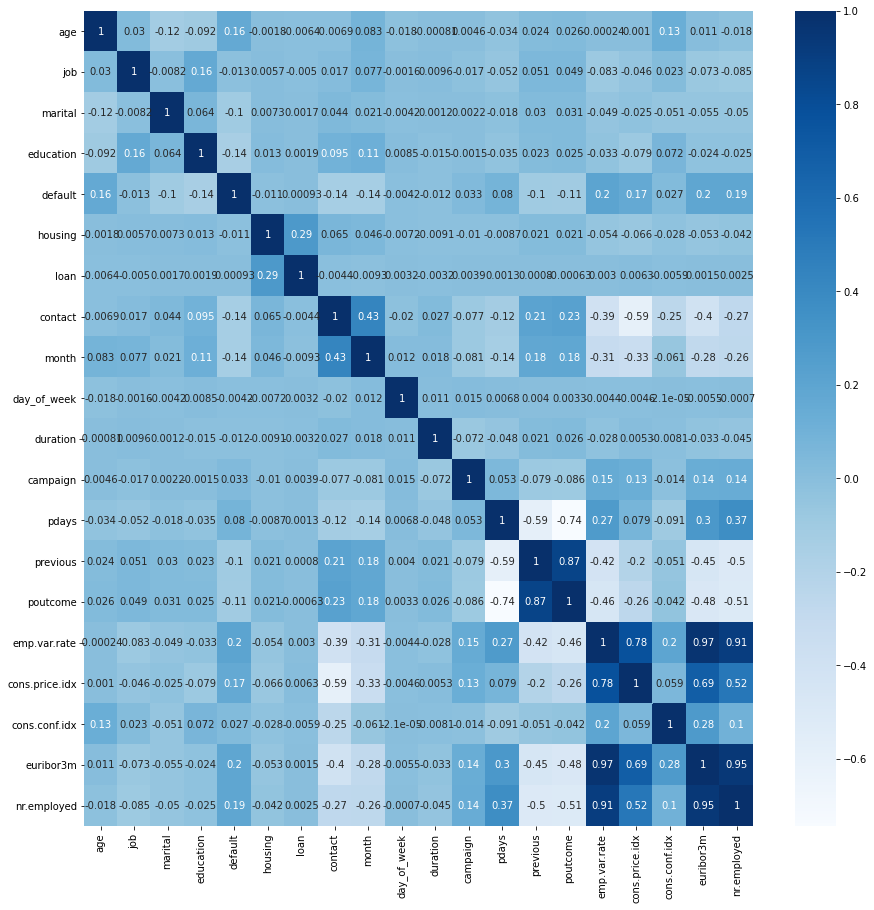

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),cmap='Blues',annot=True)

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

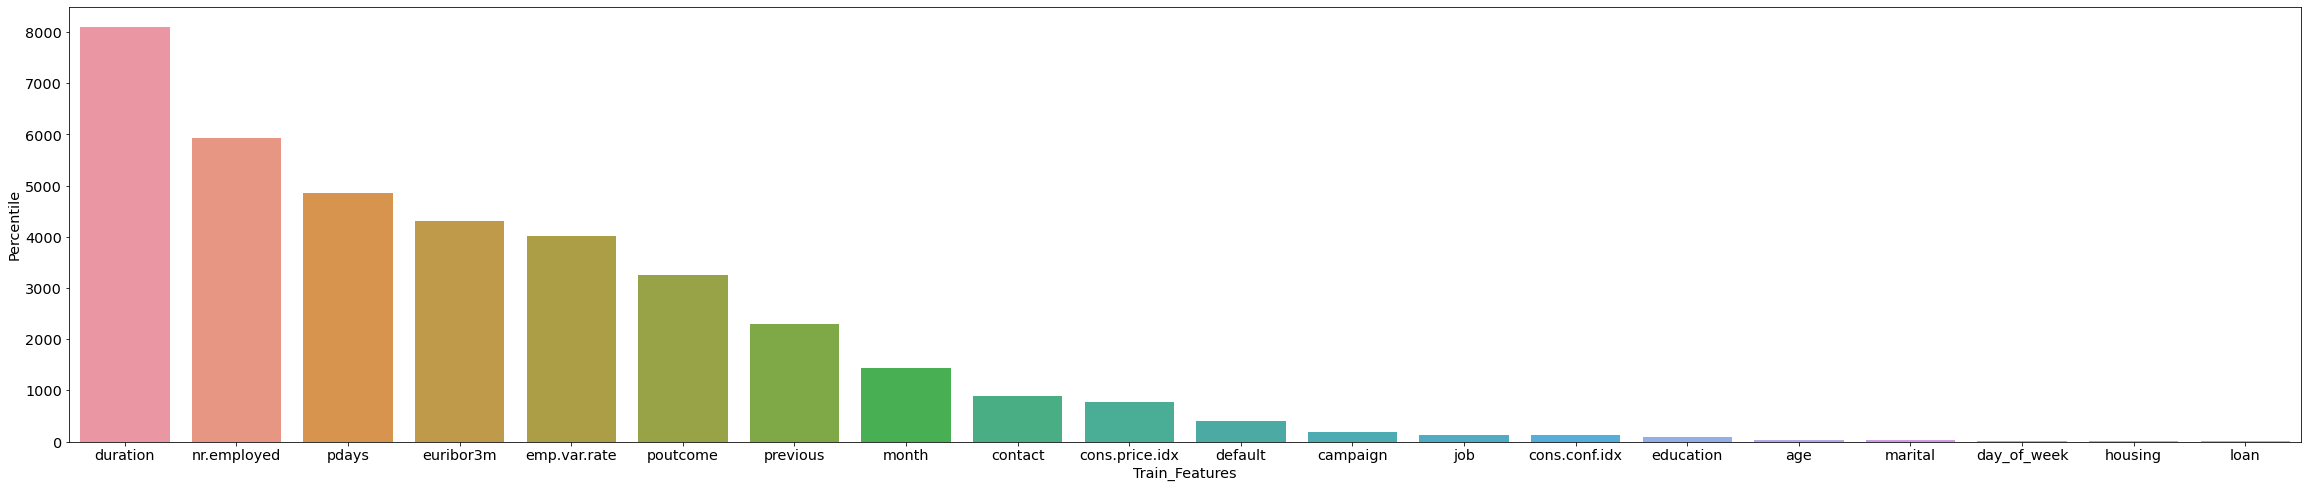

In [ ]:
#Percentile selction using Generic Univariate Select

Selector = GenericUnivariateSelect(f_classif,mode="percentile")
Fit_data = Selector.fit_transform(X,y)

Sort_Score = Selector.scores_[::]

scores= zip(train_columns,Sort_Score)   
 
final_scores= pd.DataFrame(scores, columns = ['Train_Features', 'Percentile'])
final_scores.sort_values(by=['Percentile'], inplace=True,ascending=False)

plt.figure(figsize=(40,8))
sns.barplot(x="Train_Features",y="Percentile",data=final_scores)

In [ ]:
final_scores

,Train_Features,Percentile
10,duration,8092.864331
19,nr.employed,5924.529145
12,pdays,4860.864315
18,euribor3m,4307.264549
15,emp.var.rate,4021.298297
14,poutcome,3247.936075
13,previous,2304.020429
8,month,1435.402405
7,contact,881.464614
16,cons.price.idx,777.463752


In [ ]:
#Mutual Info Classification of Features

mi=mutual_info_classif(X,y)
lst=X.columns.tolist()
mi=pd.DataFrame(mi,columns=['MI_Classification'])
mi['Feature']=lst

columns_titles = ["Feature","MI_Classification"]
mi=mi.reindex(columns=columns_titles)
mi.sort_values(by=['MI_Classification'], inplace=True,ascending=False)
print(mi)                    

           Feature  MI_Classification
18       euribor3m           0.076314
10        duration           0.075553
16  cons.price.idx           0.067801
17   cons.conf.idx           0.067423
19     nr.employed           0.064372
15    emp.var.rate           0.055381
12           pdays           0.036247
14        poutcome           0.031375
8            month           0.025619
13        previous           0.019290
0              age           0.014955
7          contact           0.013171
1              job           0.011563
4          default           0.006952
11        campaign           0.006917
9      day_of_week           0.003134
3        education           0.003001
5          housing           0.002567
6             loan           0.001700
2          marital           0.001115


In [ ]:
train_columns=['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

X= main_data[train_columns].copy()

y=main_data['y'].to_numpy()
y = y.reshape(y.shape[0], )
y=pd.Series(y)

In [ ]:
X=pd.get_dummies(X) # One Hot Encoding
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:

benchmark_model=DecisionTreeClassifier(random_state=21)

benchmark_model.fit(X_train, y_train)
pred=benchmark_model.predict(X_valid)
        
cf_rep=classification_report(y_valid,pred,digits=7)

print('---------------Benchmark Model with 20 features--------------\n')
print(cf_rep)
print('-------------------------------------------------------------')

---------------Benchmark Model with 20 features--------------

              precision    recall  f1-score   support

          no  0.9378848 0.9338518 0.9358639     10930
         yes  0.5081633 0.5249473 0.5164189      1423

    accuracy                      0.8867482     12353
   macro avg  0.7230240 0.7293995 0.7261414     12353
weighted avg  0.8883831 0.8867482 0.8875461     12353

-------------------------------------------------------------


In [243]:
Trimmed_features = ['age', 'job', 'education', 'default', 'contact', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

X= main_data[Trimmed_features].copy()

y=main_data['y'].to_numpy()
y = y.reshape(y.shape[0], )
y=pd.Series(y) 

In [244]:
X=pd.get_dummies(X) # One Hot Encoding
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=21)

In [245]:
benchmark_model=DecisionTreeClassifier(random_state=21)

benchmark_model.fit(X_train, y_train)
pred=benchmark_model.predict(X_valid)
        

cf_rep=classification_report(y_valid,pred,digits=7)
print('---------------Benchmark Model with 16 features--------------\n')
print(cf_rep)
print('-------------------------------------------------------------')

---------------Benchmark Model with 16 features--------------

              precision    recall  f1-score   support

          no  0.9367853 0.9368710 0.9368281     10930
         yes  0.5147679 0.5144062 0.5145870      1423

    accuracy                      0.8882053     12353
   macro avg  0.7257766 0.7256386 0.7257076     12353
weighted avg  0.8881711 0.8882053 0.8881882     12353

-------------------------------------------------------------


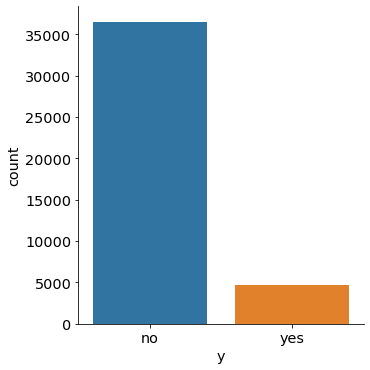

In [ ]:
sns.catplot(x='y',data=main_data,kind='count')

In [ ]:
train_columns=['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

X= main_data[train_columns].copy()

y=main_data['y'].to_numpy()
y = y.reshape(y.shape[0], )
y=pd.Series(y)

label=X[columns_num].columns
X[columns_num] = pd.DataFrame(data=Normalizer(norm='l2').fit_transform(X[columns_num]),columns=label)

X=pd.get_dummies(X) # One Hot Encoding
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
18510,0.005211,0.135302,0.000372,0.185924,0.0,0.000261,0.017479,-0.007947,0.000925,0.973000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
464,0.006049,0.030625,0.000189,0.188854,0.0,0.000208,0.017769,-0.006881,0.000918,0.981323,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
6850,0.006615,0.038743,0.000567,0.188800,0.0,0.000208,0.017764,-0.006879,0.000918,0.981043,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
11745,0.010518,0.001878,0.002817,0.187640,0.0,0.000263,0.017743,-0.007851,0.000931,0.981984,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
33294,0.007886,0.025198,0.000192,0.192156,0.0,-0.000346,0.017868,-0.008887,0.000248,0.980806,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,0.006761,0.014462,0.002066,0.187627,0.0,0.000263,0.017639,-0.008020,0.000932,0.981917,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8964,0.006385,0.024036,0.000188,0.187594,0.0,0.000263,0.017739,-0.007849,0.000914,0.981740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5944,0.006958,0.106254,0.000376,0.187872,0.0,0.000207,0.017677,-0.006845,0.000913,0.976220,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5327,0.007369,0.043836,0.000189,0.188760,0.0,0.000208,0.017760,-0.006878,0.000918,0.980831,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
benchmark_model=DecisionTreeClassifier(random_state=21)

benchmark_model.fit(X_train, y_train)
pred=benchmark_model.predict(X_valid)
        
cf_rep=classification_report(y_valid,pred,digits=7)
print('------------Benchmark Model with 20 features using Normalized Data-----------------\n')
print(cf_rep)
print('-----------------------------------------------------------------------------------')

------------Benchmark Model with 20 features using Normalized Data-----------------

              precision    recall  f1-score   support

          no  0.9375572 0.9368710 0.9372140     10930
         yes  0.5178197 0.5207309 0.5192712      1423

    accuracy                      0.8889339     12353
   macro avg  0.7276885 0.7288009 0.7282426     12353
weighted avg  0.8892057 0.8889339 0.8890692     12353

-----------------------------------------------------------------------------------


In [ ]:
print("Before OverSampling, counts of label 'yes': {}".format(sum(y_train == 'yes'))) 
print("Before OverSampling, counts of label 'no': {} \n".format(sum(y_train == 'no'))) 


Before OverSampling, counts of label 'yes': 3216
Before OverSampling, counts of label 'no': 25607 



In [ ]:
cols=X_train.columns

In [ ]:
sm = SMOTEENN(random_state = 21,sampling_strategy='all') 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print("After OverSampling, counts of label 'yes': {}".format(sum(y_train == 'yes'))) 
print("After OverSampling, counts of label 'no': {} \n".format(sum(y_train == 'no'))) 


After OverSampling, counts of label 'yes': 21221
After OverSampling, counts of label 'no': 16616 



In [ ]:
X_train=pd.DataFrame(X_train,columns=cols)

In [ ]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.006049,0.030625,0.000189,0.188854,0.0,0.000208,0.017769,-0.006881,0.000918,0.981323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.006615,0.038743,0.000567,0.188800,0.0,0.000208,0.017764,-0.006879,0.000918,0.981043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.010518,0.001878,0.002817,0.187640,0.0,0.000263,0.017743,-0.007851,0.000931,0.981984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.007886,0.025198,0.000192,0.192156,0.0,-0.000346,0.017868,-0.008887,0.000248,0.980806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.008695,0.033646,0.000945,0.188832,0.0,0.000208,0.017767,-0.006880,0.000918,0.981208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_train

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
y_train = y_train.reshape(y_train.shape[0], )
y_train=pd.Series(y_train)
y_train

0         no
1         no
2         no
3         no
4         no
        ... 
37832    yes
37833    yes
37834    yes
37835    yes
37836    yes
Length: 37837, dtype: object

In [ ]:
benchmark_model=DecisionTreeClassifier(random_state=21)

benchmark_model.fit(X_train, y_train)
pred=benchmark_model.predict(X_valid)
        
cf_rep=classification_report(y_valid,pred,digits=7)
print('------------Benchmark Model with 20 features using SMOTE with Normalized Data-----------------\n')
print(cf_rep)
print('----------------------------------------------------------------------------------------------')


------------Benchmark Model with 20 features using SMOTE with Normalized Data-----------------

              precision    recall  f1-score   support

          no  0.9603931 0.8940531 0.9260365     10930
         yes  0.4683196 0.7167955 0.5665093      1423

    accuracy                      0.8736339     12353
   macro avg  0.7143563 0.8054243 0.7462729     12353
weighted avg  0.9037089 0.8736339 0.8846209     12353

----------------------------------------------------------------------------------------------


In [197]:
# Create the parameter grid: Decsion Tree Parameter Grid

param_grid = {
    'criterion': ['entropy'],
    'splitter' : ['best'],
    'max_leaf_nodes' : range(512,4096,256),
    'max_depth' : range(8,16,2)    
}


# Instantiate the regressor: gbm
dec_classifier = DecisionTreeClassifier(random_state=21)

#Perform random search: grid_mse
dec_classifier_ = RandomizedSearchCV(param_distributions=param_grid, estimator = dec_classifier,verbose=21, scoring = ['f1_weighted','precision_weighted','recall_weighted',
                                                                                                                 'roc_auc'],refit='f1_weighted',n_jobs=4,n_iter=10,cv=10)


#Fit randomized_mse to the data
dec_classifier_.fit(X_train, y_train)

#Print the best parameters and lowest RMSE
print("Best parameters found: ", dec_classifier_.best_params_)
print("Best f1_weighted found: ", dec_classifier_.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:   13.0s
[Parallel(

Best parameters found:  {'splitter': 'best', 'max_leaf_nodes': 3840, 'max_depth': 14, 'criterion': 'entropy'}
Best f1_weighted found:  0.9577292006286602


In [198]:
benchmark_model=DecisionTreeClassifier(random_state=21,splitter ='best', max_depth=14 , criterion= 'entropy',max_leaf_nodes=3840)

benchmark_model.fit(X_train, y_train)
pred=benchmark_model.predict(X_valid)
        
cf_rep=classification_report(y_valid,pred,digits=7)
print('------------Decison Tree Model with Hyperparameter tuning-----------------\n')
print(cf_rep)
print('--------------------------------------------------------------------------')



------------Decison Tree Model with Hyperparameter tuning-----------------

              precision    recall  f1-score   support

          no  0.9649349 0.8887466 0.9252750     10930
         yes  0.4680665 0.7519325 0.5769749      1423

    accuracy                      0.8729863     12353
   macro avg  0.7165007 0.8203396 0.7511250     12353
weighted avg  0.9076983 0.8729863 0.8851527     12353

--------------------------------------------------------------------------


In [191]:
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'boosting_type':['gbdt'],
    'n_estimators': range(512,1024,128),
    'max_depth': range(3,6),
    'class_weight' : ['balanced'],
    'min_data_in_leaf': [20,30,40,50,60,70],
    'num_leaves': range(256,512,4),
    'learning_rate': np.linspace(0.05,0.50,10),
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'early_stopping_rounds': [100],
    'n_jobs':[4]
}

eval_set = [(X_train, y_train)]

# Instantiate the regressor: gbm
lgbm_random = lgb(random_state=21,objective='binary')

#Perform random search: grid_mse
lgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,estimator = lgbm_random,verbose=20, scoring = ['f1_weighted','precision_weighted','recall_weighted',
                                                                                                                 'roc_auc'],refit='f1_weighted', n_iter = 100,cv=3,n_jobs=4)

#Fit randomized_mse to the data
lgb_random.fit(X_train, y_train,eval_metric="error", eval_set=eval_set)

#Print the best parameters and lowest RMSE
print("Best parameters found: ", lgb_random.best_params_)
print("Best f1_weighted found: ", lgb_random.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   41.8s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   55.6s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  1.7min
[Parallel(

[1]	training's binary_logloss: 0.556106	training's binary_error: 0.0833077
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.463702	training's binary_error: 0.0703736
[3]	training's binary_logloss: 0.396555	training's binary_error: 0.0699433
[4]	training's binary_logloss: 0.345687	training's binary_error: 0.0648996
[5]	training's binary_logloss: 0.304436	training's binary_error: 0.0599282
[6]	training's binary_logloss: 0.269744	training's binary_error: 0.0584148
[7]	training's binary_logloss: 0.242675	training's binary_error: 0.057641
[8]	training's binary_logloss: 0.222969	training's binary_error: 0.0558327
[9]	training's binary_logloss: 0.206861	training's binary_error: 0.0557842
[10]	training's binary_logloss: 0.192572	training's binary_error: 0.0539077
[11]	training's binary_logloss: 0.180987	training's binary_error: 0.0531645
[12]	training's binary_logloss: 0.171029	training's binary_error: 0.0520744
[13]	training's binary_logloss: 0.1

In [201]:
#LGBM 
model=lgb(objective='binary',max_bin=128,subsample = 1, num_leaves = 376, n_jobs = 4, n_estimators = 640, min_data_in_leaf = 20,
          max_depth = 5, learning_rate = 0.2, colsample_bytree = 0.6, boosting_type = 'gbdt',class_weight= 'balanced',random_state=21)
eval_set = [(X_train, y_train)]

model.fit(X_train, y_train,eval_metric="error", eval_set=eval_set, verbose=False)
pred=model.predict(X_valid)
        
cf_rep=classification_report(y_valid,pred,digits=7)
print('------------Boosted Decison Tree Model with Hyperparameter tuning-----------------\n')
print(cf_rep)

print('----------------------------------------------------------------------------------')


------------Boosted Decison Tree Model with Hyperparameter tuning-----------------

              precision    recall  f1-score   support

          no  0.9675363 0.9025618 0.9339203     10930
         yes  0.5062587 0.7673928 0.6100559      1423

    accuracy                      0.8869910     12353
   macro avg  0.7368975 0.8349773 0.7719881     12353
weighted avg  0.9143996 0.8869910 0.8966128     12353

----------------------------------------------------------------------------------


In [214]:
feed=[['Benchmark Model with 20 features',0.8875461],['Benchmark Model with 20 features with Normalized Data',0.8890692],
      ['Benchmark Model with 20 features using SMOTE with Normalized Data',0.8846209],['Decison Tree Model with Hyperparameter tuning',0.8851527]
      ,['Boosted Decison Tree Model with Hyperparameter tuning',0.9008223]]
pd.set_option('max_colwidth', 80)
df=pd.DataFrame(feed,columns=['Project Phase','F1_Weighted Score'])
df

,Project Phase,F1_Weighted Score
0,Benchmark Model with 20 features,0.887546
1,Benchmark Model with 20 features with Normalized Data,0.889069
2,Benchmark Model with 20 features using SMOTE with Normalized Data,0.884621
3,Decison Tree Model with Hyperparameter tuning,0.885153
4,Boosted Decison Tree Model with Hyperparameter tuning,0.900822


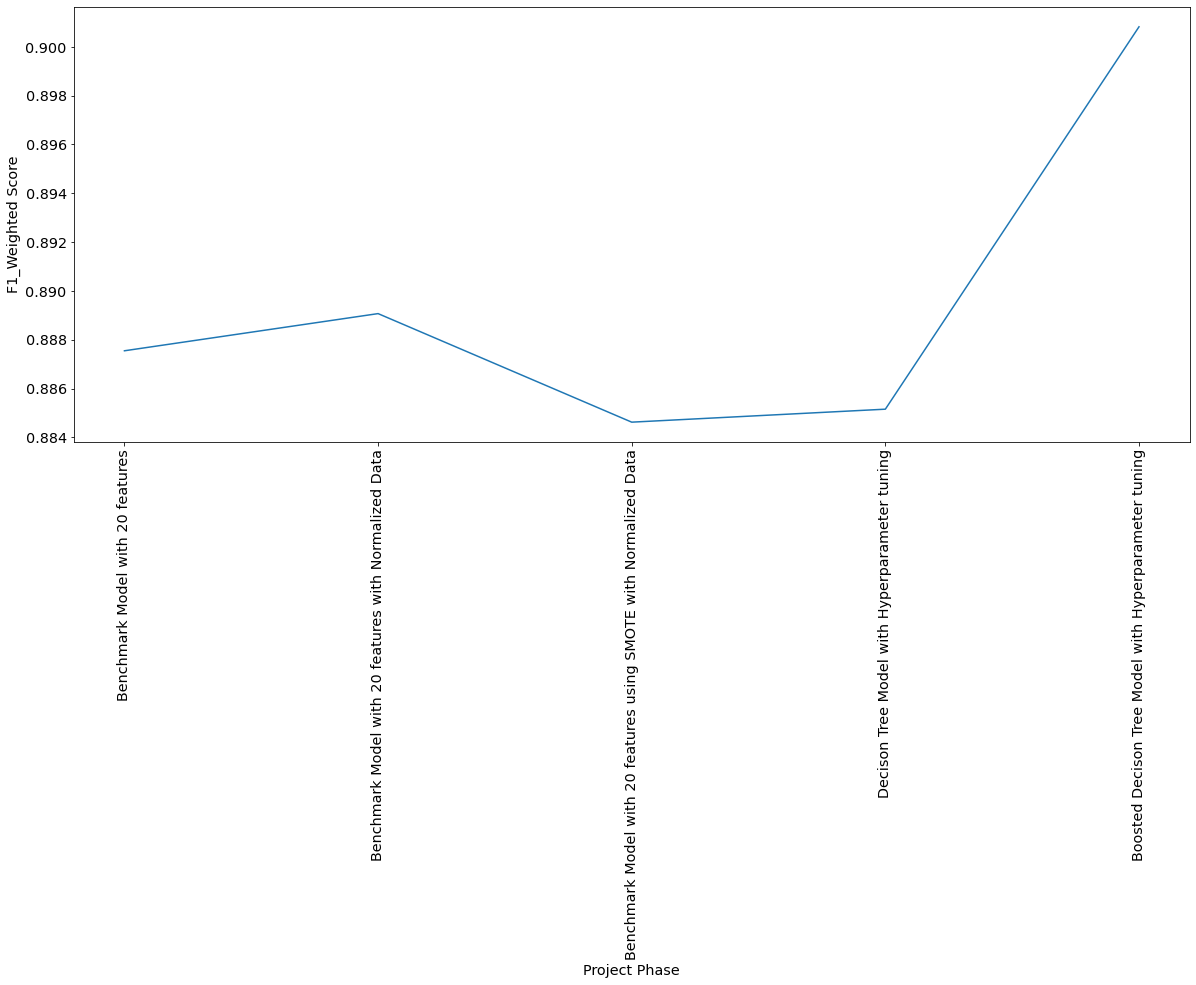

In [227]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.lineplot(x='Project Phase',y='F1_Weighted Score',data=df)